In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(6,6), 'figure.dpi':300})
sns.set_style("white")

## 1. Adding LOEUF to all Lambert TF genes

Downloaded constraint metrics here https://gnomad.broadinstitute.org/downloads#v4

In [2]:
gnomad_lof_metrics = pd.read_csv("../data/gnomad.v4.1.constraint_metrics.tsv", sep = "\t")
gnomad_lof_metrics = gnomad_lof_metrics[gnomad_lof_metrics["canonical"] == True]
gnomad_lof_metrics

,gene,gene_id,transcript,canonical,mane_select,lof_hc_lc.obs,lof_hc_lc.exp,lof_hc_lc.possible,lof_hc_lc.oe,lof_hc_lc.mu,...,syn.oe_ci.lower,syn.oe_ci.upper,syn.z_raw,syn.z_score,constraint_flags,level,transcript_type,chromosome,cds_length,num_coding_exons
0,A1BG,1,NM_130786.4,True,True,45.0,43.048,193.0,1.04540,7.063300e-07,...,0.973,1.172,-1.166000,-0.635490,[],NaN,NaN,NaN,NaN,NaN
1,A1BG,ENSG00000121410,ENST00000263100,True,True,45.0,43.048,193.0,1.04540,7.063300e-07,...,0.973,1.172,-1.166000,-0.635490,[],2.0,protein_coding,chr19,1485.0,8.0
8,A1CF,29974,NM_014576.4,True,True,45.0,69.962,352.0,0.64320,9.547100e-07,...,0.903,1.103,0.032727,0.017838,[],NaN,NaN,NaN,NaN,NaN
18,A1CF,ENSG00000148584,ENST00000373997,True,True,45.0,69.962,352.0,0.64320,9.547100e-07,...,0.903,1.103,0.032727,0.017838,[],2.0,protein_coding,chr10,1758.0,11.0
23,A2M,2,NM_000014.6,True,True,95.0,147.240,745.0,0.64522,1.344500e-06,...,0.806,0.929,3.368800,1.836200,[],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211517,NaN,ENSG00000289282,ENST00000687518,True,False,3.0,27.914,105.0,0.10747,7.913800e-07,...,0.908,1.317,-0.767990,-0.418590,[],2.0,protein_coding,chr6,390.0,5.0
211518,NaN,ENSG00000289346,ENST00000625377,True,False,5.0,12.136,71.0,0.41201,1.796400e-07,...,0.191,0.412,5.816400,3.170200,[],2.0,protein_coding,chr7,2847.0,15.0
211519,NaN,ENSG00000289503,ENST00000553426,True,False,NaN,NaN,NaN,NaN,NaN,...,0.633,1.457,0.208200,0.113480,"[""no_exp_lof""]",2.0,nonsense_mediated_decay,chr14,208.0,3.0
211520,NaN,ENSG00000289517,ENST00000617178,True,False,NaN,NaN,NaN,NaN,NaN,...,0.833,1.217,-0.038967,-0.021239,"[""no_exp_lof""]",2.0,nonsense_mediated_decay,chr22,440.0,4.0


In [3]:
gnomad_lof_metrics = gnomad_lof_metrics[["gene", "gene_id", "lof.oe_ci.upper", "transcript"]]
gnomad_lof_metrics = gnomad_lof_metrics.drop_duplicates()
gnomad_lof_metrics = gnomad_lof_metrics.rename(columns = {"lof.oe_ci.upper" : "LOEUF"})
gnomad_lof_metrics

,gene,gene_id,LOEUF,transcript
0,A1BG,1,1.340,NM_130786.4
1,A1BG,ENSG00000121410,1.340,ENST00000263100
8,A1CF,29974,0.825,NM_014576.4
18,A1CF,ENSG00000148584,0.825,ENST00000373997
23,A2M,2,0.765,NM_000014.6
...,...,...,...,...
211517,NaN,ENSG00000289282,0.278,ENST00000687518
211518,NaN,ENSG00000289346,0.871,ENST00000625377
211519,NaN,ENSG00000289503,NaN,ENST00000553426
211520,NaN,ENSG00000289517,NaN,ENST00000617178


In [99]:
lambert_TFs = pd.read_excel("../data/lambert_supp_tables.xlsx", sheet_name = "Table S1. Related to Figure 1B")
# lambert_TFs["uniprotID"] = lambert_TFs["GeneName"].str.split("|").str[1]
lambert_TFs = lambert_TFs[lambert_TFs["Is TF?"] == "Yes"]
lambert_TFs = lambert_TFs.rename(columns = {"Gene Information" : "gene_id", "Unnamed: 1" : "gene"})
lambert_TFs = lambert_TFs[["gene_id", "gene"]]
lambert_TFs

,gene_id,gene
1,ENSG00000137203,TFAP2A
2,ENSG00000008196,TFAP2B
3,ENSG00000087510,TFAP2C
4,ENSG00000008197,TFAP2D
5,ENSG00000116819,TFAP2E
...,...,...
2760,ENSG00000177683,THAP5
2761,ENSG00000174796,THAP6
2762,ENSG00000184436,THAP7
2763,ENSG00000161277,THAP8


In [100]:
lambert_TFs[["gene"]].to_csv("../data/Lambert_TFs_genes.csv", header = None, index = None)

In [104]:
TF_prim_gene_names = pd.read_csv("../data/idmapping_reviewed_true_2024_12_09.tsv", sep = "\t")
TF_prim_gene_names

,From,Entry,Gene Names (primary)
0,E2F8,A0AVK6,E2F8
1,FEZF1,A0PJY2,FEZF1
2,FAM170A,A1A519,FAM170A
3,ZBTB7C,A1YPR0,ZBTB7C
4,ZNF320,A2RRD8,ZNF320
...,...,...,...
1646,NCOA3,Q9Y6Q9,NCOA3
1647,ZNF780B,Q9Y6R6,ZNF780B
1648,SETBP1,Q9Y6X0,SETBP1
1649,ZHX2,Q9Y6X8,ZHX2


In [107]:
lambert_TFs = pd.merge(lambert_TFs, TF_prim_gene_names, left_on = "gene", right_on = "From", how = "left")
lambert_TFs

,gene_id,gene,From,Entry,Gene Names (primary)
0,ENSG00000137203,TFAP2A,TFAP2A,P05549,TFAP2A
1,ENSG00000008196,TFAP2B,TFAP2B,Q92481,TFAP2B
2,ENSG00000087510,TFAP2C,TFAP2C,Q92754,TFAP2C
3,ENSG00000008197,TFAP2D,TFAP2D,Q7Z6R9,TFAP2D
4,ENSG00000116819,TFAP2E,TFAP2E,Q6VUC0,TFAP2E
...,...,...,...,...,...
1658,ENSG00000177683,THAP5,THAP5,Q7Z6K1,THAP5
1659,ENSG00000174796,THAP6,THAP6,Q8TBB0,THAP6
1660,ENSG00000184436,THAP7,THAP7,Q9BT49,THAP7
1661,ENSG00000161277,THAP8,THAP8,Q8NA92,THAP8


In [108]:
lambert_TFs = pd.merge(lambert_TFs, gnomad_lof_metrics, how = "left", on = "gene_id")

In [109]:
lambert_TFs = lambert_TFs.drop(columns = "gene_y").rename(columns = {"gene_x" : "gene"})
lambert_TFs

,gene_id,gene,From,Entry,Gene Names (primary),LOEUF,transcript
0,ENSG00000137203,TFAP2A,TFAP2A,P05549,TFAP2A,0.334,ENST00000379613
1,ENSG00000008196,TFAP2B,TFAP2B,Q92481,TFAP2B,0.353,ENST00000393655
2,ENSG00000087510,TFAP2C,TFAP2C,Q92754,TFAP2C,0.417,ENST00000201031
3,ENSG00000008197,TFAP2D,TFAP2D,Q7Z6R9,TFAP2D,0.389,ENST00000008391
4,ENSG00000116819,TFAP2E,TFAP2E,Q6VUC0,TFAP2E,1.418,ENST00000373235
...,...,...,...,...,...,...,...
1658,ENSG00000177683,THAP5,THAP5,Q7Z6K1,THAP5,1.089,ENST00000415914
1659,ENSG00000174796,THAP6,THAP6,Q8TBB0,THAP6,1.028,ENST00000311638
1660,ENSG00000184436,THAP7,THAP7,Q9BT49,THAP7,1.147,ENST00000215742
1661,ENSG00000161277,THAP8,THAP8,Q8NA92,THAP8,1.615,ENST00000292894


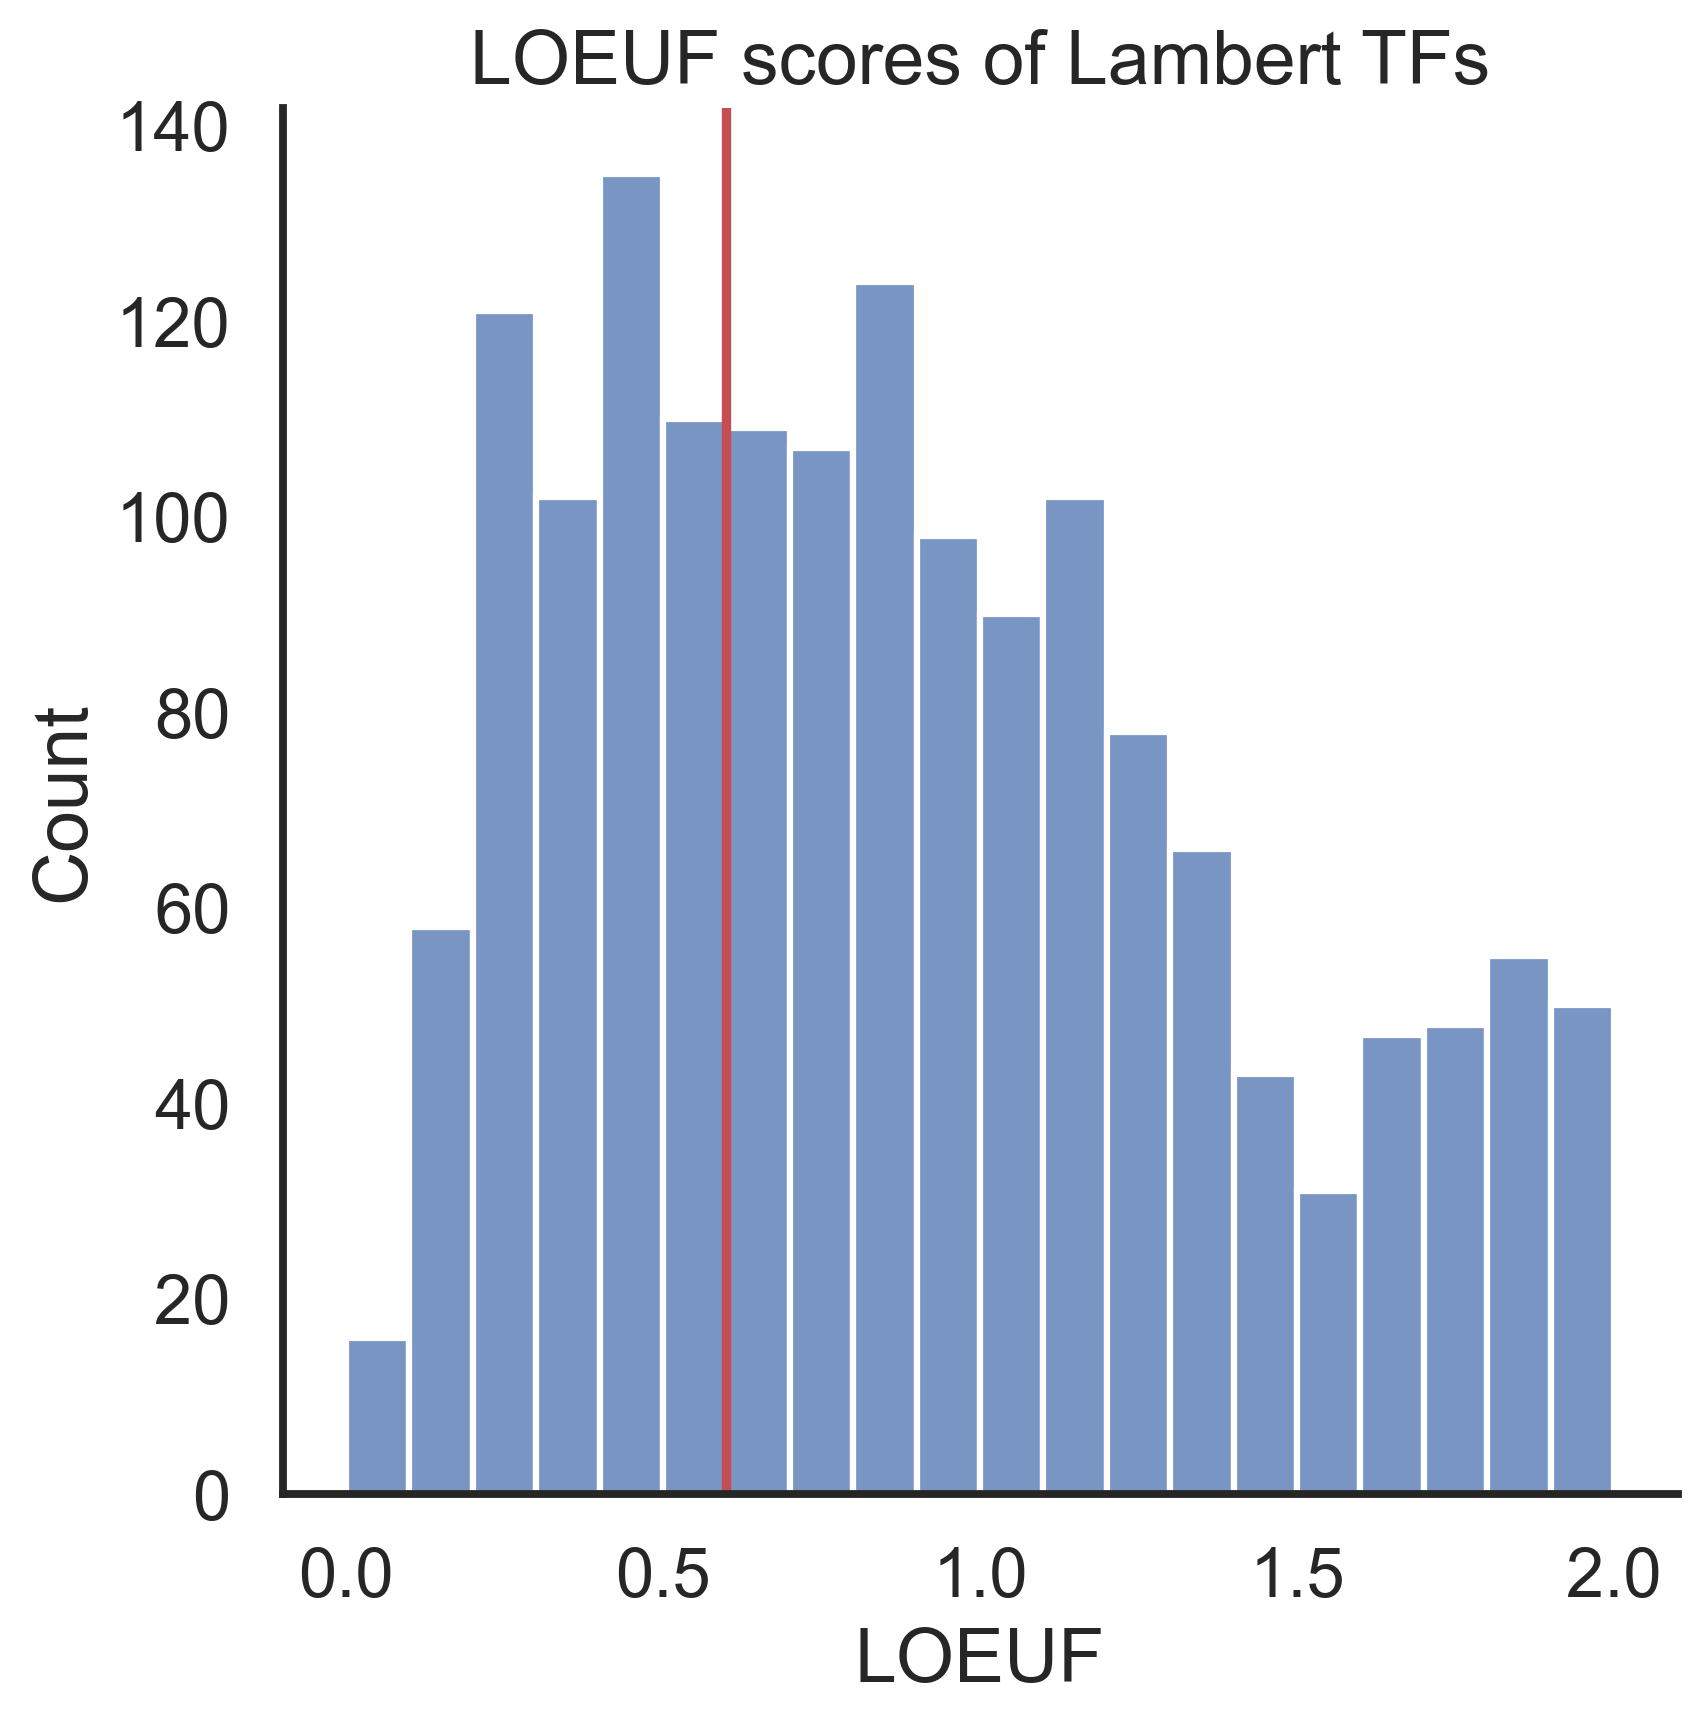

In [110]:
plt.rcParams['figure.dpi'] = 300

sns.set_context('talk')

sns.histplot(lambert_TFs["LOEUF"], bins = np.arange(0, 2.1, 0.1))
plt.axvline(0.6, 0,2, color = "r")
sns.despine()
plt.title("LOEUF scores of Lambert TFs");

In [86]:
# Activator TFs
known_ADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")

#known_ADs[["uniprotID"]].to_csv("../data/AD_uniprotIDs.csv", index = None, header = None)

mappings = pd.read_csv("../data/idmapping_2024_12_09.tsv", sep = "\t")
#mappings["Gene Names"] = mappings["Gene Names"].str.split(" ").str[0]
mappings

,From,Entry,Reviewed,Gene Names (primary)
0,Q6UWZ7,Q6UWZ7,reviewed,ABRAXAS1
1,Q8IUX7,Q8IUX7,reviewed,AEBP1
2,Q8WYP5,Q8WYP5,reviewed,AHCTF1
3,P35869,P35869,reviewed,AHR
4,O43918,O43918,reviewed,AIRE
...,...,...,...,...
574,Q8N1G0,Q8N1G0,reviewed,ZNF687
575,P17040,P17040,reviewed,ZSCAN20
576,P98168,P98168,reviewed,ZXDA
577,P98169,P98169,reviewed,ZXDB


In [87]:
#known_ADs["uniprotID"] = known_ADs["uniprotID"].str.split("-").str[0]
known_ADs = pd.merge(known_ADs, mappings, left_on = "uniprotID", right_on = "From", how = "left")
known_ADs = known_ADs[known_ADs["TileType"] == "TF"]
known_ADs

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes,From,Entry,Reviewed,Gene Names (primary)
1,AEBP1,1088,1158,Q8IUX7,[['Q8IUX7']],NaN,Q8IUX7,Staller Activity Data,TF,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,NaN,Q8IUX7,Q8IUX7,reviewed,AEBP1
2,AHCTF1,1445,1698,Q8WYP5,"[['Q8WYP5'], ['Q8WYP5']]",nan / nan,Q8WYP5 / Q8WYP5,"PMID: 11952839, Soto / transcriptionalactivity...",TF,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,NaN,Q8WYP5,Q8WYP5,reviewed,AHCTF1
3,AHR,118,126,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,LLQALNGFV,NaN,P35869,P35869,reviewed,AHR
4,AHR,266,268,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,FAI,NaN,P35869,P35869,reviewed,AHR
5,AHR,532,848,P35869,"[['P35869'], ['P35869'], ['P35869']]",ENST00000242057 / nan / ENST00000242057,P35869 / P35869 / P35869,"DelRosso et al. / PMID: 8794892, Soto / DelRos...",TF,QDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDL...,NaN,P35869,P35869,reviewed,AHR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,ZSCAN20,262,341,P17040,"[['P17040', 'P17040-3']]",ENST00000361328,P17040,DelRosso et al.,TF,PSNTSEKEQGPEFWGLSLINSGKRSTADYSLDNEPAQALTWRDSRA...,NaN,P17040,P17040,reviewed,ZSCAN20
740,ZXDA,572,699,P98168,"[['P98168'], ['P98168']]",nan / nan,P98168 / P98168 / P98168,"PMID: 17493635, Soto / R4TA_regions.txt / acti...",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,P98168,P98168,reviewed,ZXDA
741,ZXDB,576,703,P98169,[['P98169']],NaN,P98169 / P98169,"R4TA_regions.txt / activation_regions.txt, GSL",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,P98169,P98169,reviewed,ZXDB
742,ZXDC,579,688,Q2QGD7,"[['Q2QGD7', 'Q2QGD7-2'], ['Q2QGD7', 'Q2QGD7-2']]",nan / nan,Q2QGD7 / Q2QGD7 / Q2QGD7,"PMID: 16600381, Soto / R4TA_regions.txt / acti...",TF,DSPLVLGTAATVLQQGSFSVDDVQTVSAGALGCLVALPMKNLSDDP...,NaN,Q2QGD7,Q2QGD7,reviewed,ZXDC


In [112]:
activator_TFs = lambert_TFs[lambert_TFs["Gene Names (primary)"].isin(known_ADs["Gene Names (primary)"])]
other_TFs =  lambert_TFs[~lambert_TFs["Gene Names (primary)"].isin(known_ADs["Gene Names (primary)"])]

In [240]:
def plot_LOEUF_diff(df1, label1, df2, label2, title = "Lambert TFs Constraint"):
    plt.rcParams['figure.dpi'] = 300

    sns.set_style('ticks')
    sns.set_context('talk')
    
    # print(str(len(df1)) + " " + label1)
    # print(str(len(df2)) + " " + label2)

    sns.histplot(df1["LOEUF"], bins = np.arange(0, 2.05, 0.05), label = label1 + ", (n=" + str(len(df1)) + ")" , stat = 'density', linewidth = 0, alpha = 0.7)
    sns.histplot(df2["LOEUF"], bins = np.arange(0, 2.05, 0.05), label = label2 + ", (n=" + str(len(df2)) + ")", stat = 'density', linewidth = 0, alpha = 0.7)
    plt.legend()
    plt.axvline(0.6, 0,2, color = "r")
    sns.despine()
    plt.title(title);



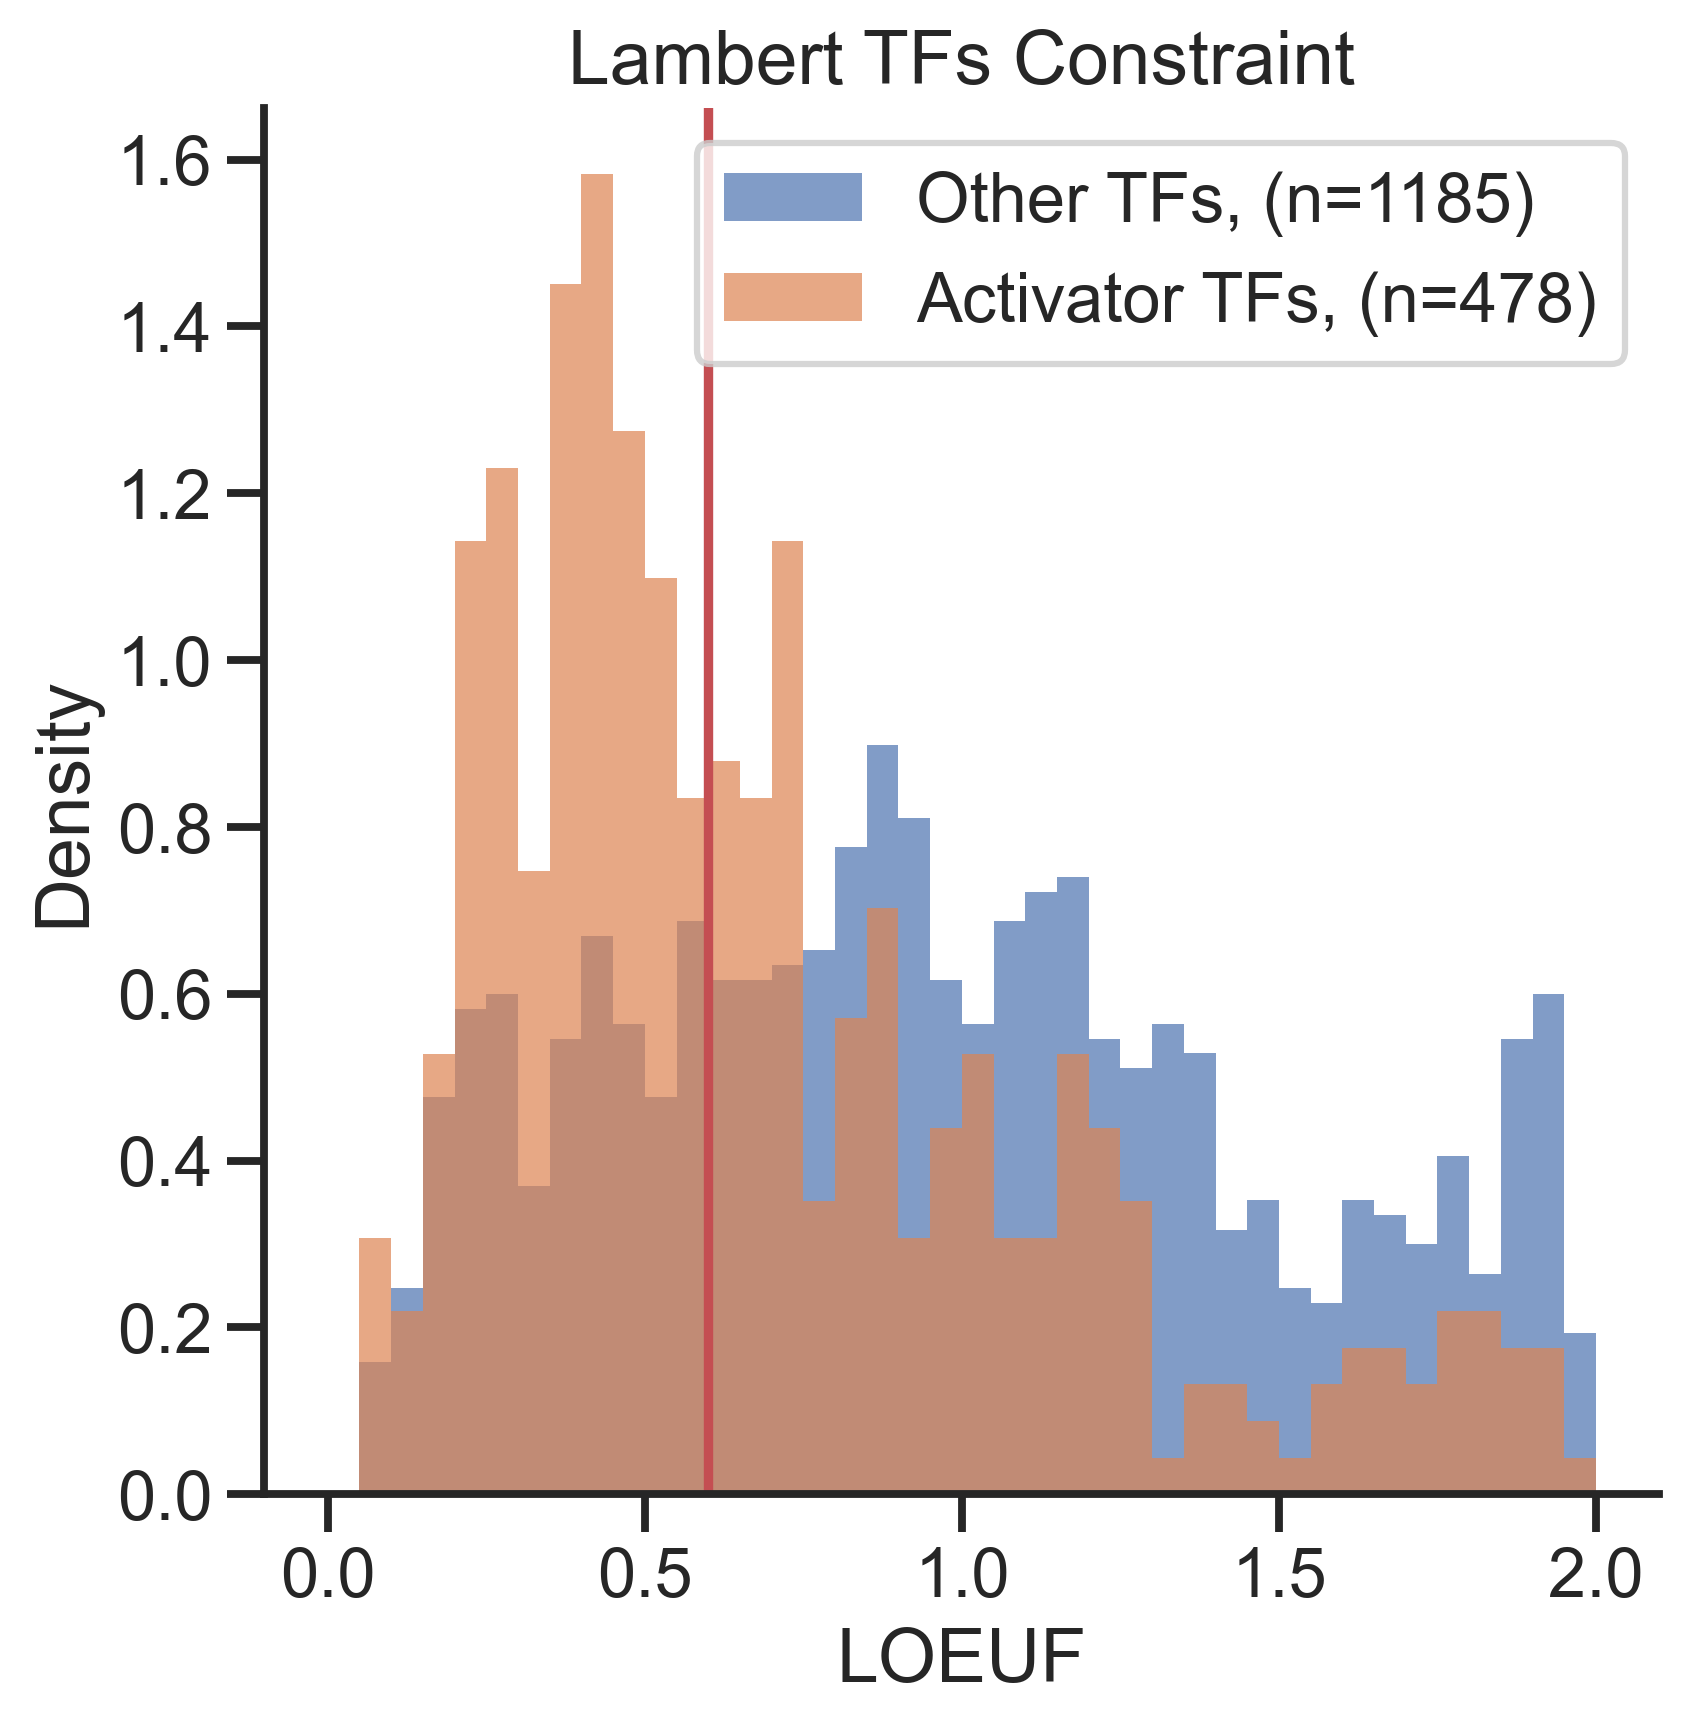

In [243]:
plot_LOEUF_diff(other_TFs, "Other TFs", activator_TFs, "Activator TFs")

In [231]:
c2h2_zf_gene_names = pd.read_csv("../data/c2h2_zf_gene_names.csv", header = 1)
c2h2_zf_gene_names

,HGNC ID (gene),Approved symbol,Approved name,Previous symbols,Aliases,Chromosome
0,HGNC:15766,ADNP,activity dependent neuroprotector homeobox,NaN,"KIAA0784,ADNP1",20q13.13
1,HGNC:24051,AEBP2,AE binding protein 2,NaN,MGC17922,12p12.3
2,HGNC:15984,APTX,aprataxin,AXA1,"FLJ20157,AOA,AOA1,EAOH,EOAHA",9p21.1
3,HGNC:784,ATF2,activating transcription factor 2,CREB2,"TREB7,CRE-BP1,HB16",2q31.1
4,HGNC:792,ATF7,activating transcription factor 7,NaN,ATFA,12q13.13
...,...,...,...,...,...,...
774,HGNC:777,ZFHX3,zinc finger homeobox 3,"ATBF1,C16orf47","ZNF927,FLJ26184",16q22.2-q22.3
775,HGNC:4320,GLI4,GLI family zinc finger 4,NaN,"HKR4,ZNF928",8q24.3
776,HGNC:30690,SP9,Sp9 transcription factor,NaN,ZNF990,2q31.1
777,HGNC:21224,ZUP1,zinc finger containing ubiquitin peptidase 1,"C6orf113,ZUFSP",dJ412I7.3,6q22.1


In [232]:
c2h2_zf_TFs = lambert_TFs[lambert_TFs["Gene Names (primary)"].isin(c2h2_zf_gene_names["Approved symbol"])]
non_c2h2_zf_TFs =  lambert_TFs[~lambert_TFs["Gene Names (primary)"].isin(c2h2_zf_gene_names["Approved symbol"])]

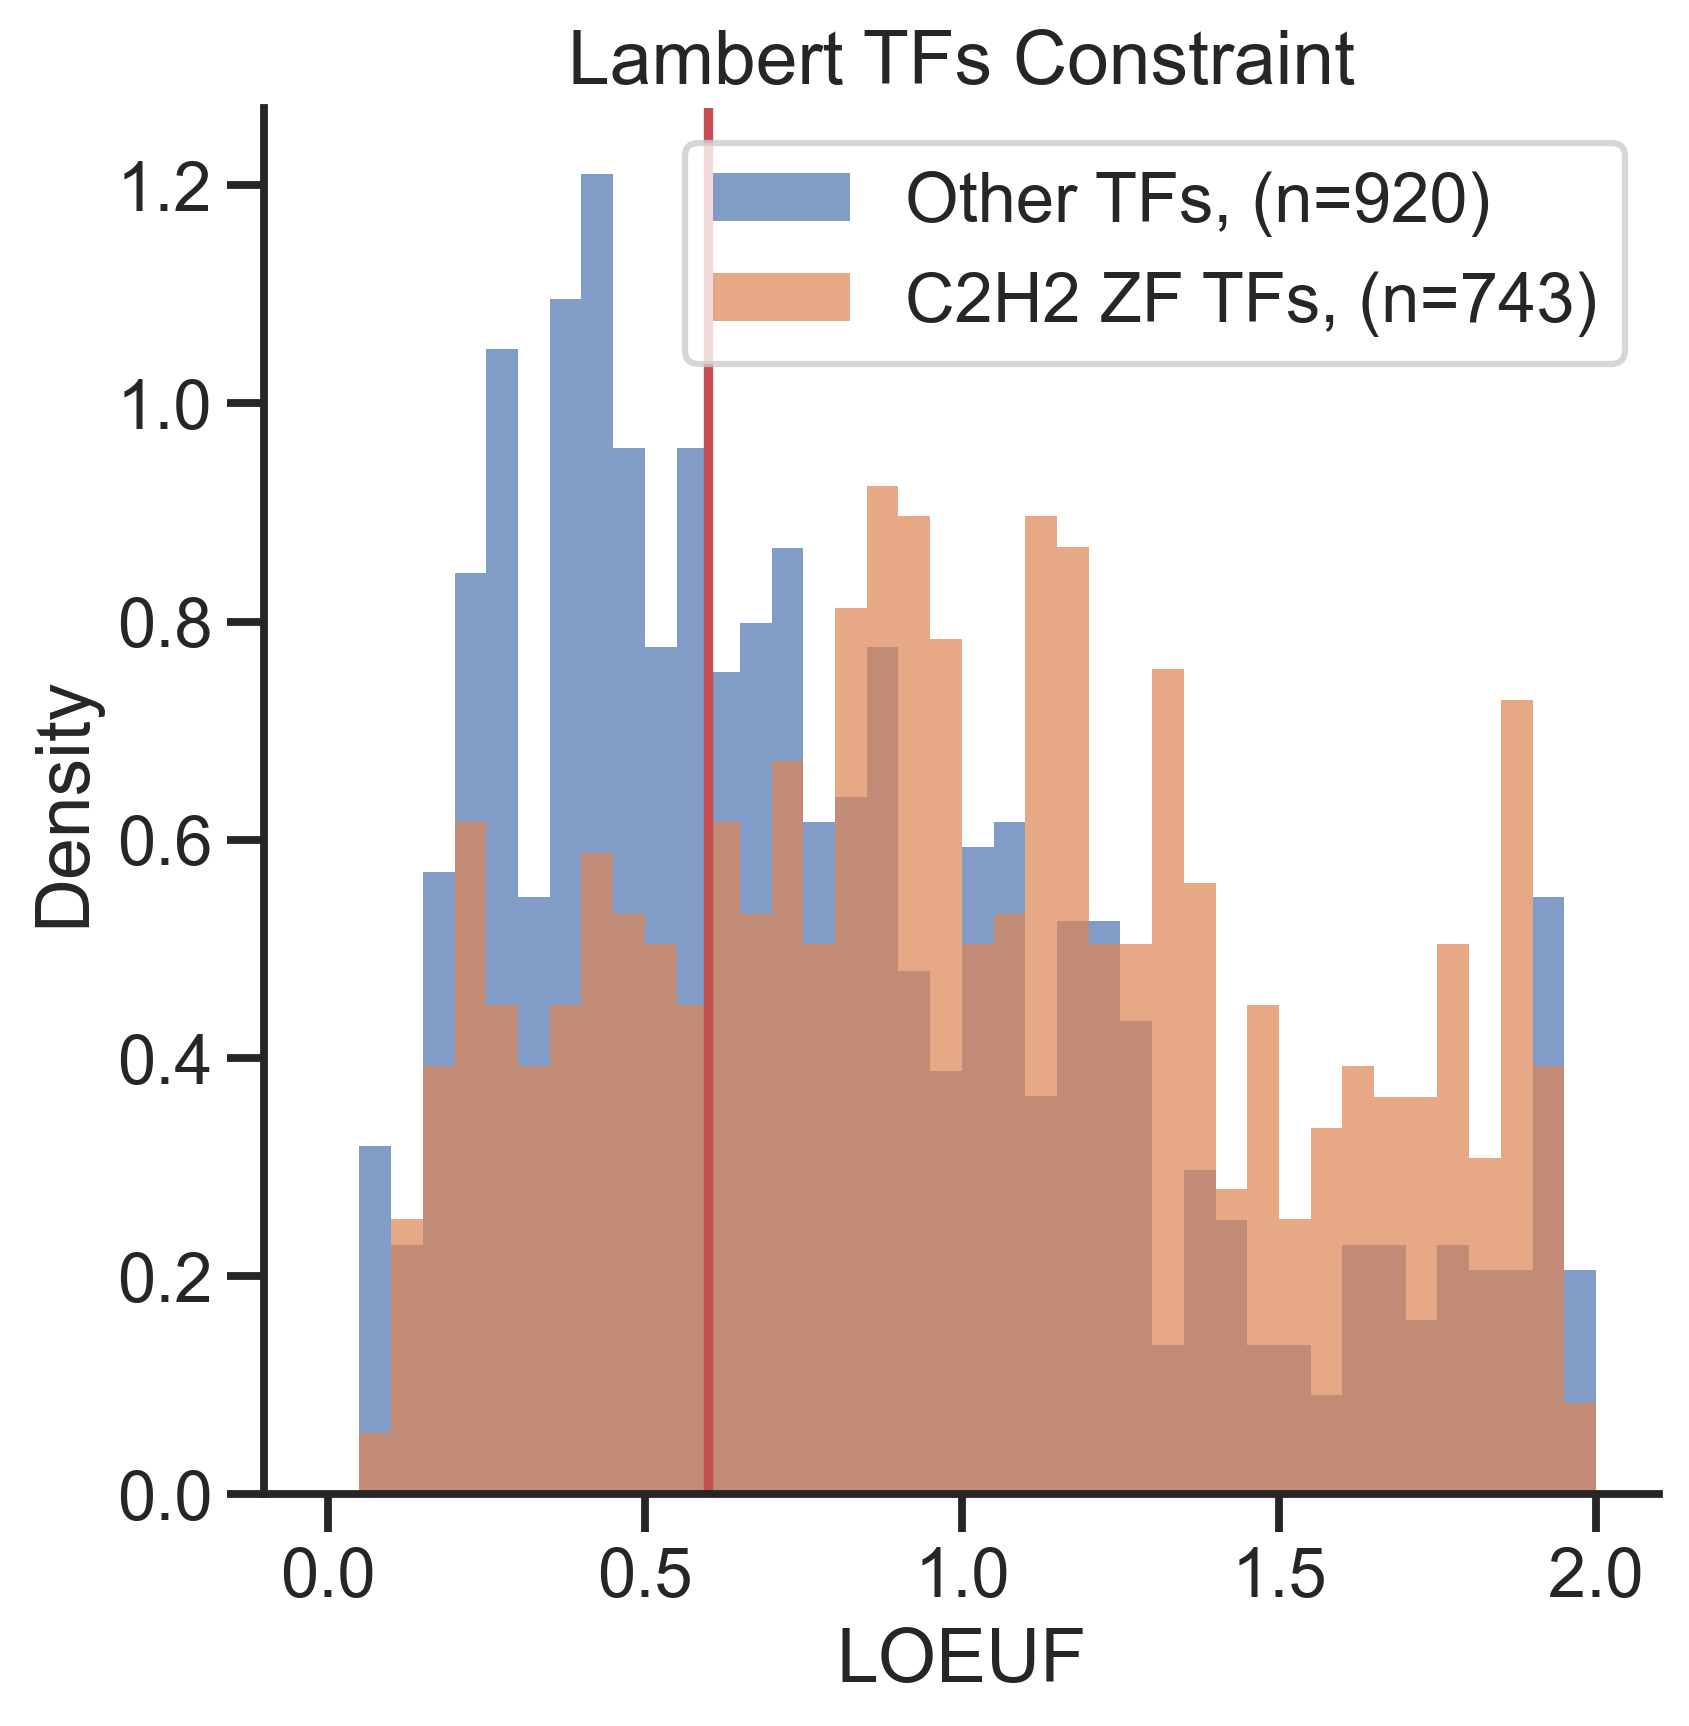

In [244]:
plot_LOEUF_diff(non_c2h2_zf_TFs, "Other TFs", c2h2_zf_TFs, "C2H2 ZF TFs", )

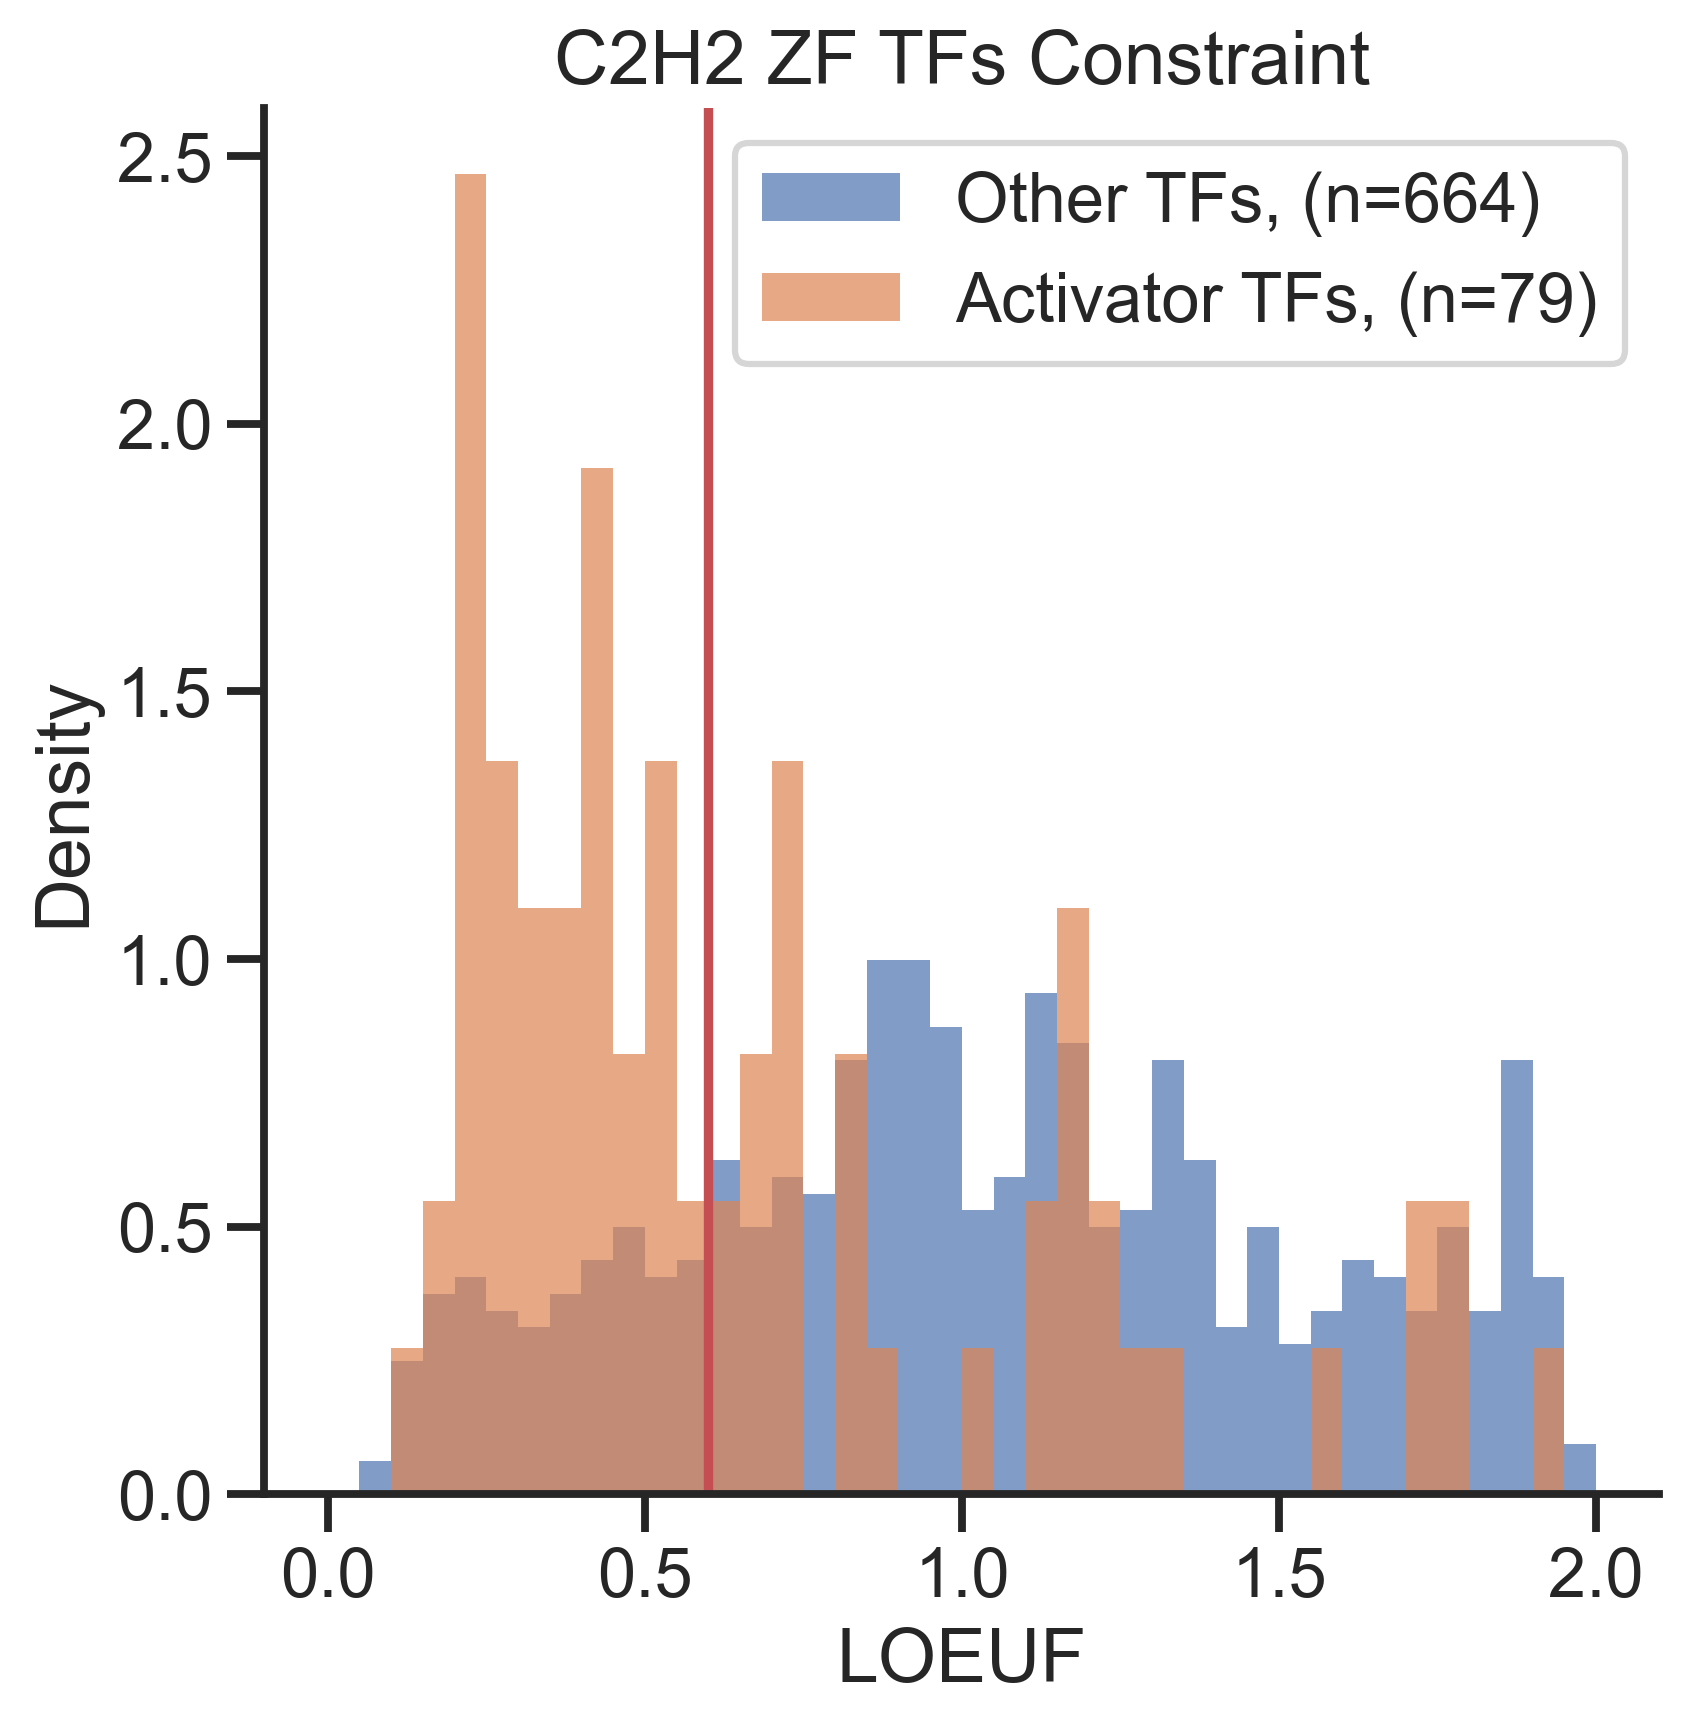

In [236]:
activator_C2H2s = c2h2_zf_TFs[c2h2_zf_TFs["Gene Names (primary)"].isin(known_ADs["Gene Names (primary)"])]
other_C2H2s =  c2h2_zf_TFs[~c2h2_zf_TFs["Gene Names (primary)"].isin(known_ADs["Gene Names (primary)"])]

plot_LOEUF_diff(other_C2H2s, "Other TFs", activator_C2H2s, "Activator TFs", title = "C2H2 ZF TFs Constraint")

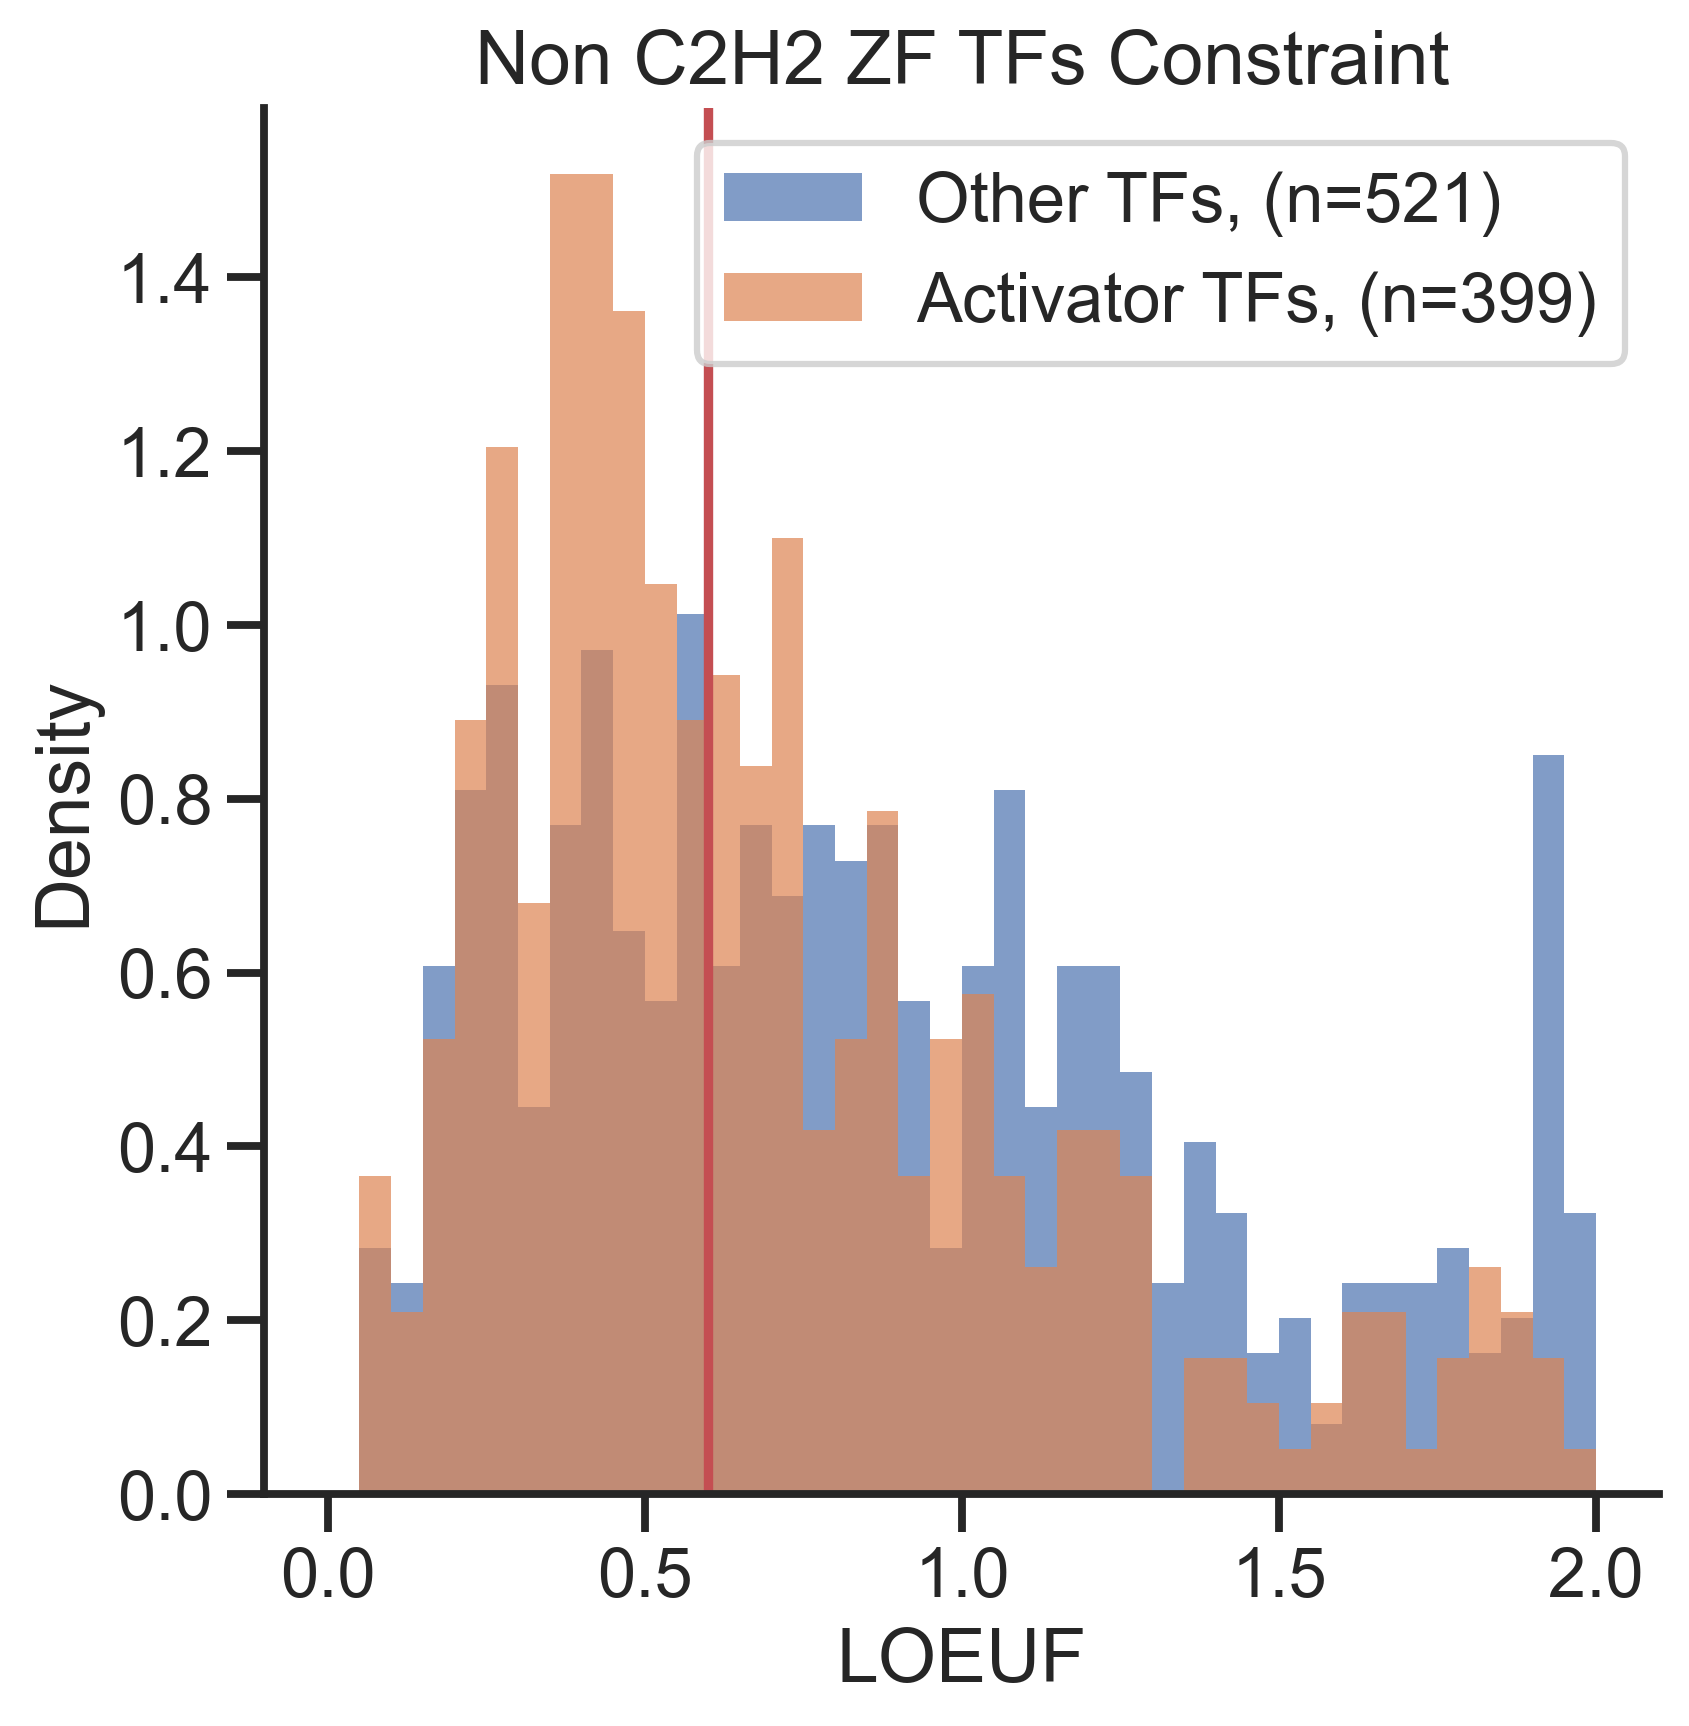

In [237]:
activator_non_C2H2s = non_c2h2_zf_TFs[non_c2h2_zf_TFs["Gene Names (primary)"].isin(known_ADs["Gene Names (primary)"])]
other_non_C2H2s =  non_c2h2_zf_TFs[~non_c2h2_zf_TFs["Gene Names (primary)"].isin(known_ADs["Gene Names (primary)"])]

plot_LOEUF_diff(other_non_C2H2s, "Other TFs", activator_non_C2H2s, "Activator TFs", title = "Non C2H2 ZF TFs Constraint")

## 2. Adding LOEUF to all SFARI Genes

In [8]:
SFARI_genes = pd.read_csv("../data/SFARI-Gene_genes_01-23-2023release_03-21-2023export.csv")
SFARI_genes

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,7
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,2
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,10
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,5
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10
...,...,...,...,...,...,...,...,...,...,...
1113,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4
1114,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16
1115,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,3
1116,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,6


In [9]:
SFARI_genes = pd.merge(SFARI_genes, gnomad_lof_metrics, how = "left", left_on = "ensembl-id", right_on = "gene_id")
SFARI_genes

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,gene,gene_id,LOEUF,transcript
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,7,ABAT,ENSG00000183044,0.871,ENST00000268251
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,2,ABCA10,ENSG00000154263,1.044,ENST00000690296
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,10,ABCA13,ENSG00000179869,1.063,ENST00000435803
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,5,ABCA7,ENSG00000064687,1.368,ENST00000263094
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10,ABL2,ENSG00000143322,0.578,ENST00000502732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4,ZNF774,ENSG00000196391,1.645,ENST00000354377
1114,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16,ZNF804A,ENSG00000170396,0.370,ENST00000302277
1115,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,3,ZNF827,ENSG00000151612,0.197,ENST00000508784
1116,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,6,ZSWIM6,ENSG00000130449,0.146,ENST00000252744


<Axes: xlabel='LOEUF', ylabel='Density'>

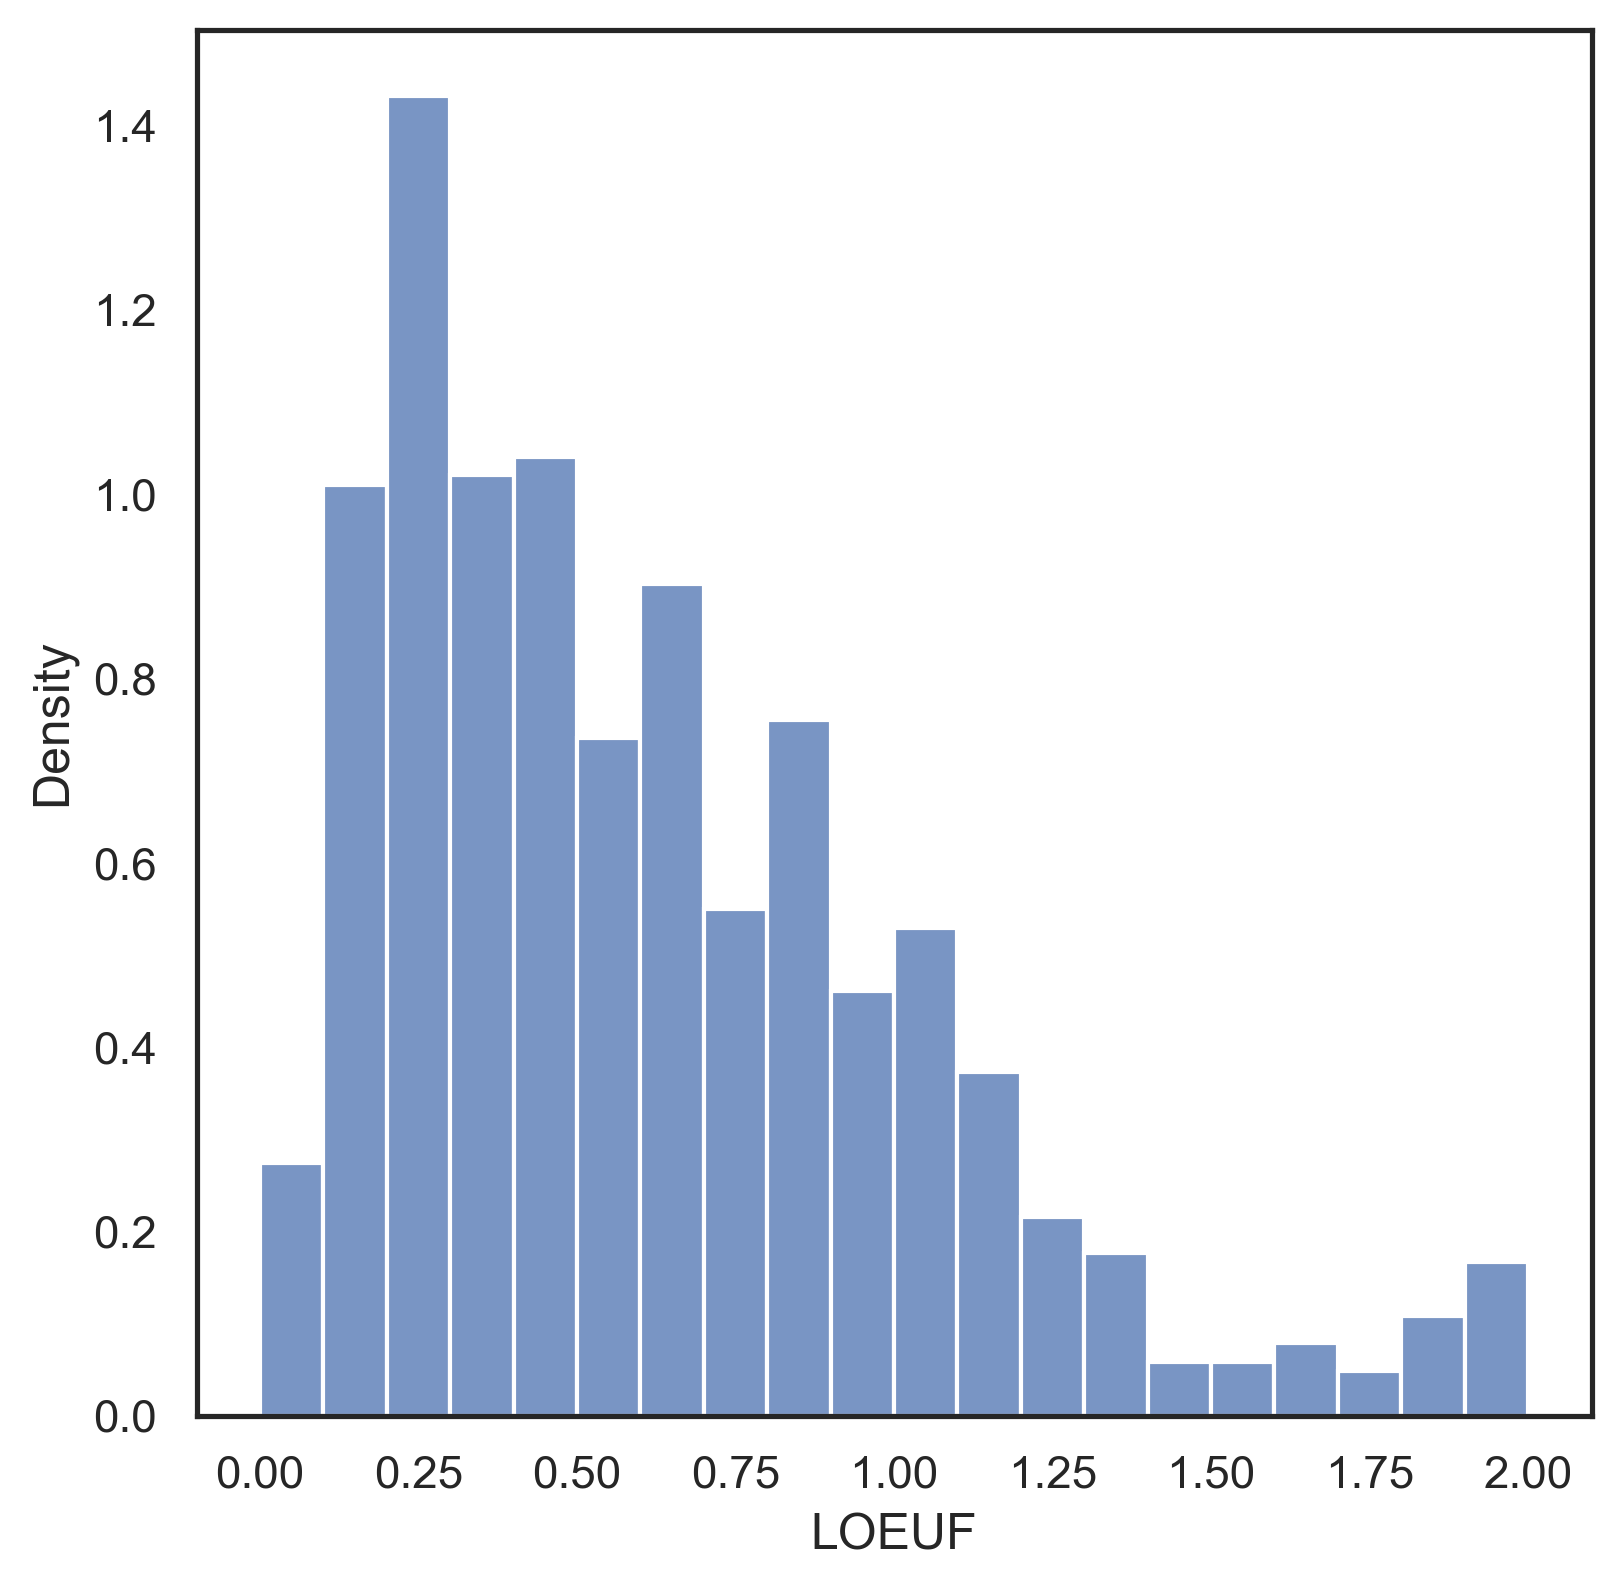

In [10]:
sns.histplot(SFARI_genes["LOEUF"], stat = "density", bins = np.arange(0, 2.1, 0.1))

## 3. Adding LOEUF to all SFARI TFs

In [11]:
SFARI_TFs = lambert_TFs[lambert_TFs["gene_id"].isin(SFARI_genes["ensembl-id"])]
SFARI_TFs

,gene_id,gene,LOEUF,transcript
10,ENSG00000117139,KDM5B,0.858,ENST00000367265
11,ENSG00000189079,ARID2,0.224,ENST00000334344
13,ENSG00000126705,AHDC1,0.168,ENST00000673934
15,ENSG00000116539,ASH1L,0.104,ENST00000392403
23,ENSG00000135365,PHF21A,0.149,ENST00000676320
...,...,...,...,...
1589,ENSG00000008441,NFIX,0.092,ENST00000592199
1592,ENSG00000141646,SMAD4,0.227,ENST00000342988
1605,ENSG00000136535,TBR1,0.246,ENST00000389554
1606,ENSG00000184058,TBX1,0.703,ENST00000649276


In [12]:
known_ADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")
SFARI_TFs_with_ADs = SFARI_TFs[SFARI_TFs["gene"].isin(known_ADs["Gene"])]
SFARI_TFs

,gene_id,gene,LOEUF,transcript
10,ENSG00000117139,KDM5B,0.858,ENST00000367265
11,ENSG00000189079,ARID2,0.224,ENST00000334344
13,ENSG00000126705,AHDC1,0.168,ENST00000673934
15,ENSG00000116539,ASH1L,0.104,ENST00000392403
23,ENSG00000135365,PHF21A,0.149,ENST00000676320
...,...,...,...,...
1589,ENSG00000008441,NFIX,0.092,ENST00000592199
1592,ENSG00000141646,SMAD4,0.227,ENST00000342988
1605,ENSG00000136535,TBR1,0.246,ENST00000389554
1606,ENSG00000184058,TBX1,0.703,ENST00000649276


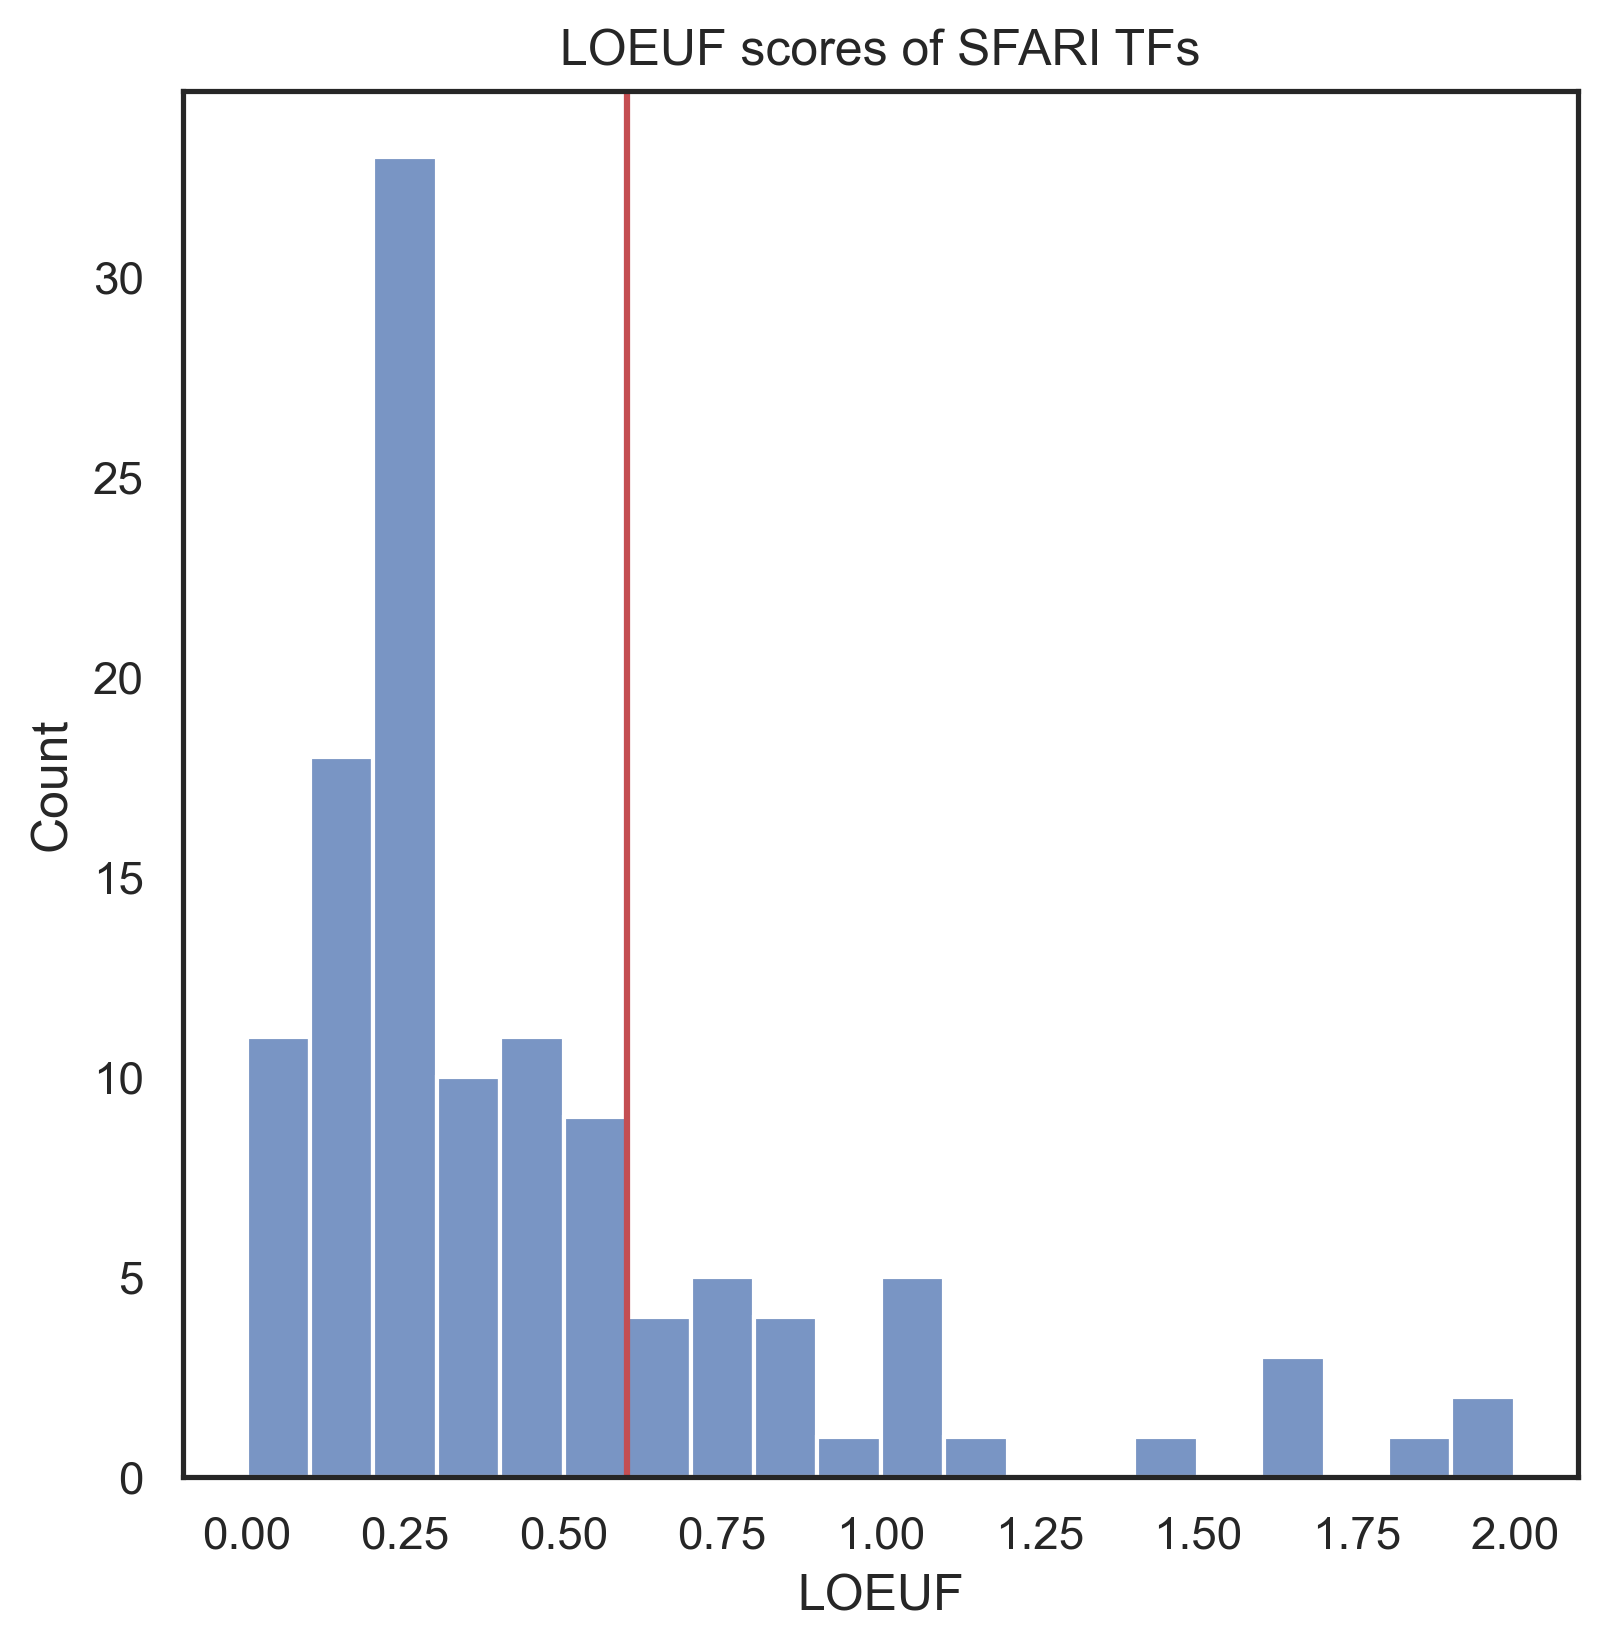

In [13]:
sns.histplot(SFARI_TFs["LOEUF"], bins = np.arange(0, 2.1, 0.1))
plt.axvline(0.6, 0,2, color = "r")
plt.title("LOEUF scores of SFARI TFs");

## 4. Adding LOEUF to SFARI TF hits

In [14]:
# From http://localhost:8888/notebooks/Desktop/Staller_Lab/SFARI/soto_analysis/notebooks/All%20hit%20gene%20names.ipynb

hits = ['ARX',
 'CAMTA2',
 'CASZ1',
 'ERG',
 'IKZF1',
 'MEIS2',
 'NCOA1',
 'NKX2-2',
 'NR1D1',
 'NR4A2',
 'OTX1',
 'PAX5',
 'PAX6',
 'PITX1',
 'RORA',
 'TCF7L2',
 'YY1']

In [15]:
SFARI_TF_hits = SFARI_TFs[SFARI_TFs["gene"].isin(hits)]
SFARI_TF_hits

,gene_id,gene,LOEUF,transcript
100,ENSG00000084676,NCOA1,0.298,ENST00000348332
215,ENSG00000130940,CASZ1,0.285,ENST00000377022
252,ENSG00000185811,IKZF1,0.320,ENST00000331340
346,ENSG00000100811,YY1,0.200,ENST00000262238
976,ENSG00000108509,CAMTA2,0.512,ENST00000348066
1033,ENSG00000157554,ERG,0.234,ENST00000288319
1153,ENSG00000148737,TCF7L2,0.474,ENST00000627217
1161,ENSG00000004848,ARX,NaN,NaN
1272,ENSG00000134138,MEIS2,0.255,ENST00000561208
1287,ENSG00000125820,NKX2-2,0.640,ENST00000377142


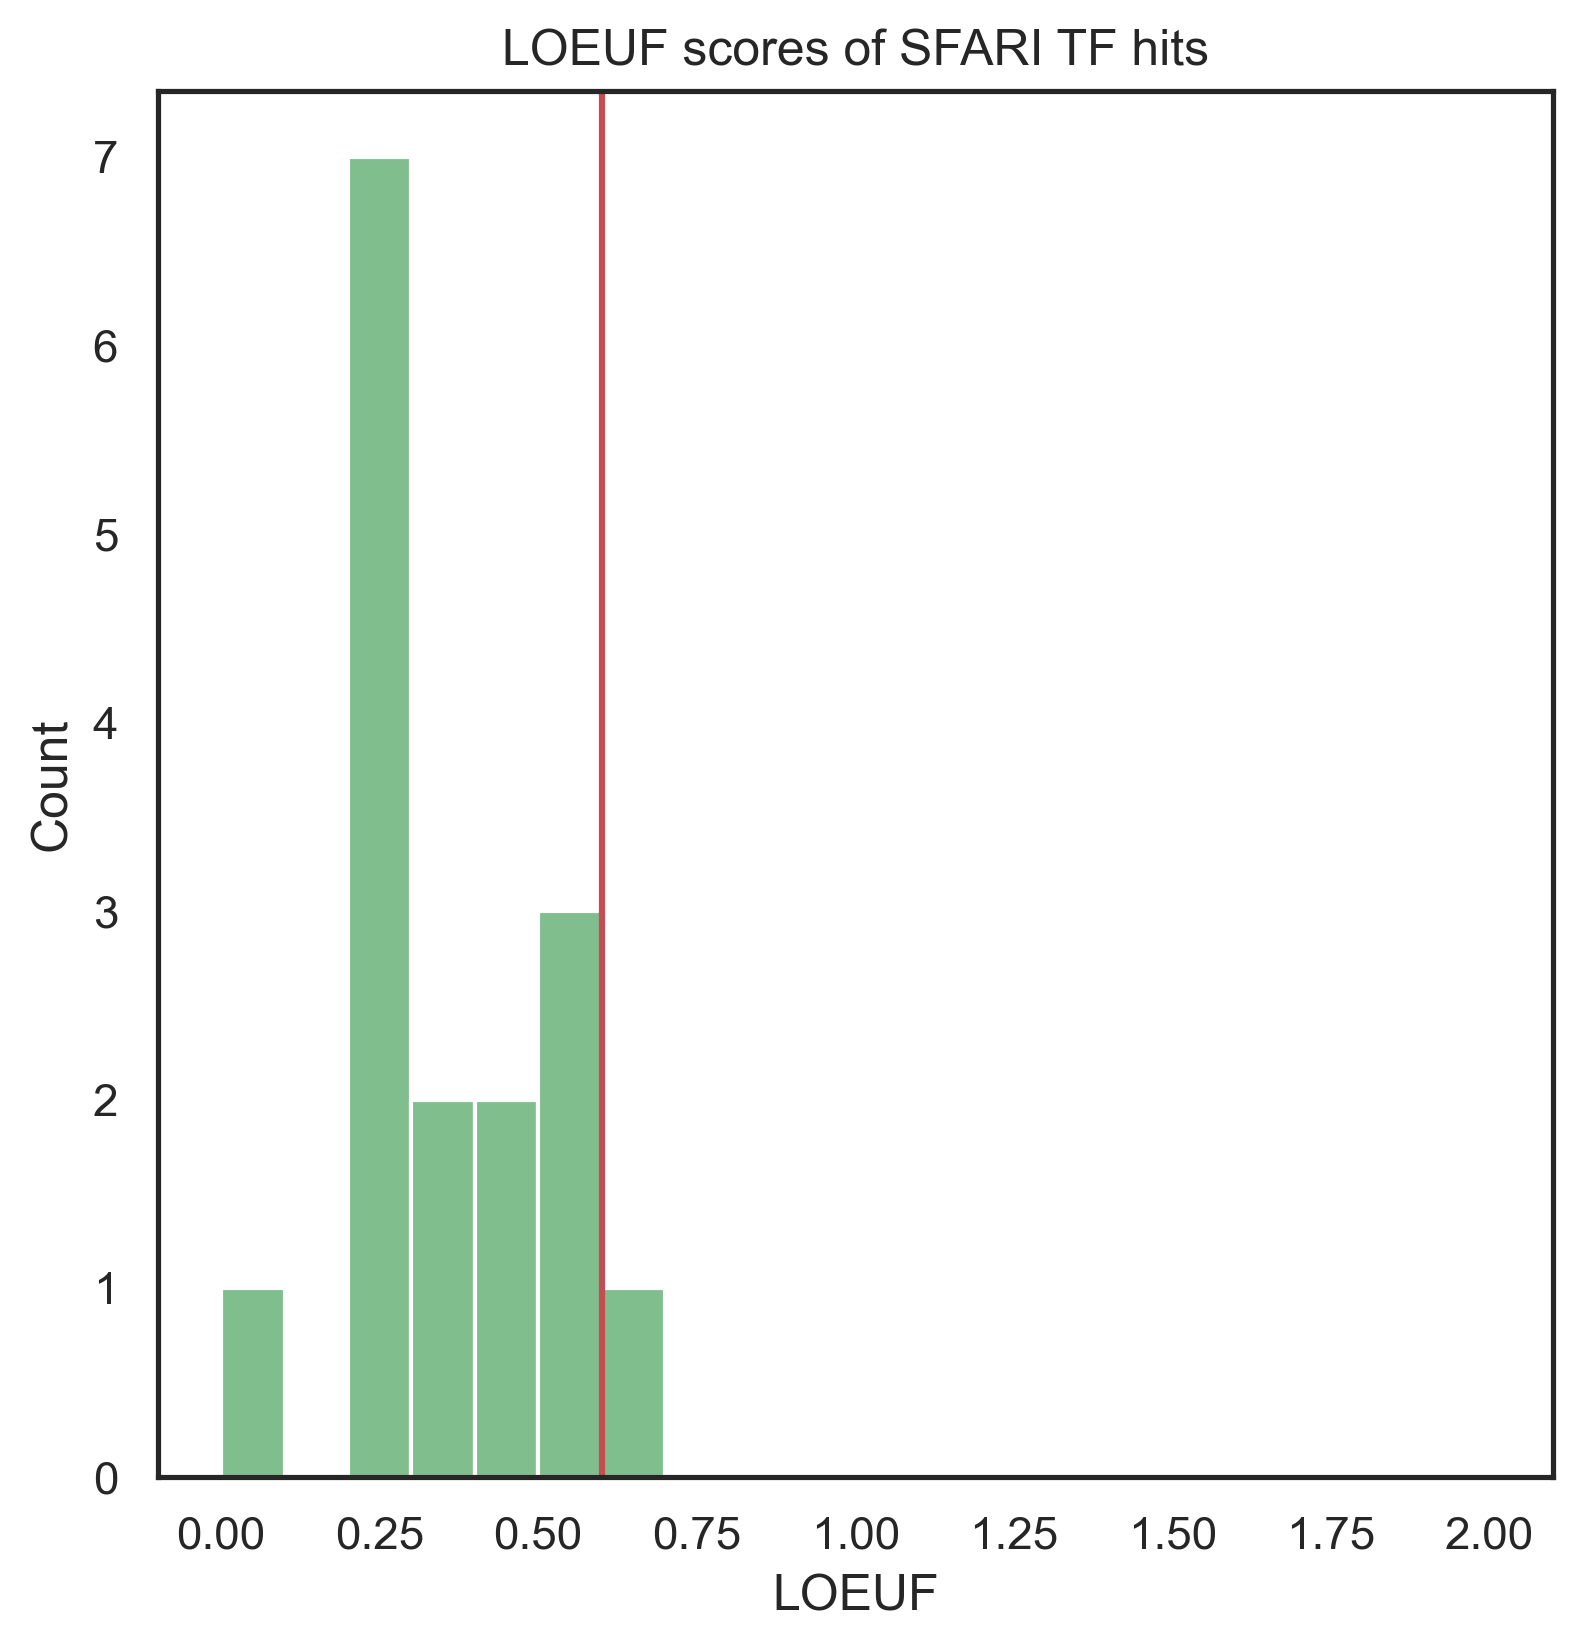

In [16]:
sns.histplot(SFARI_TF_hits["LOEUF"], bins = np.arange(0, 2.1, 0.1), color = 'g')
plt.axvline(0.6, 0,2, color = "r")
plt.title("LOEUF scores of SFARI TF hits");

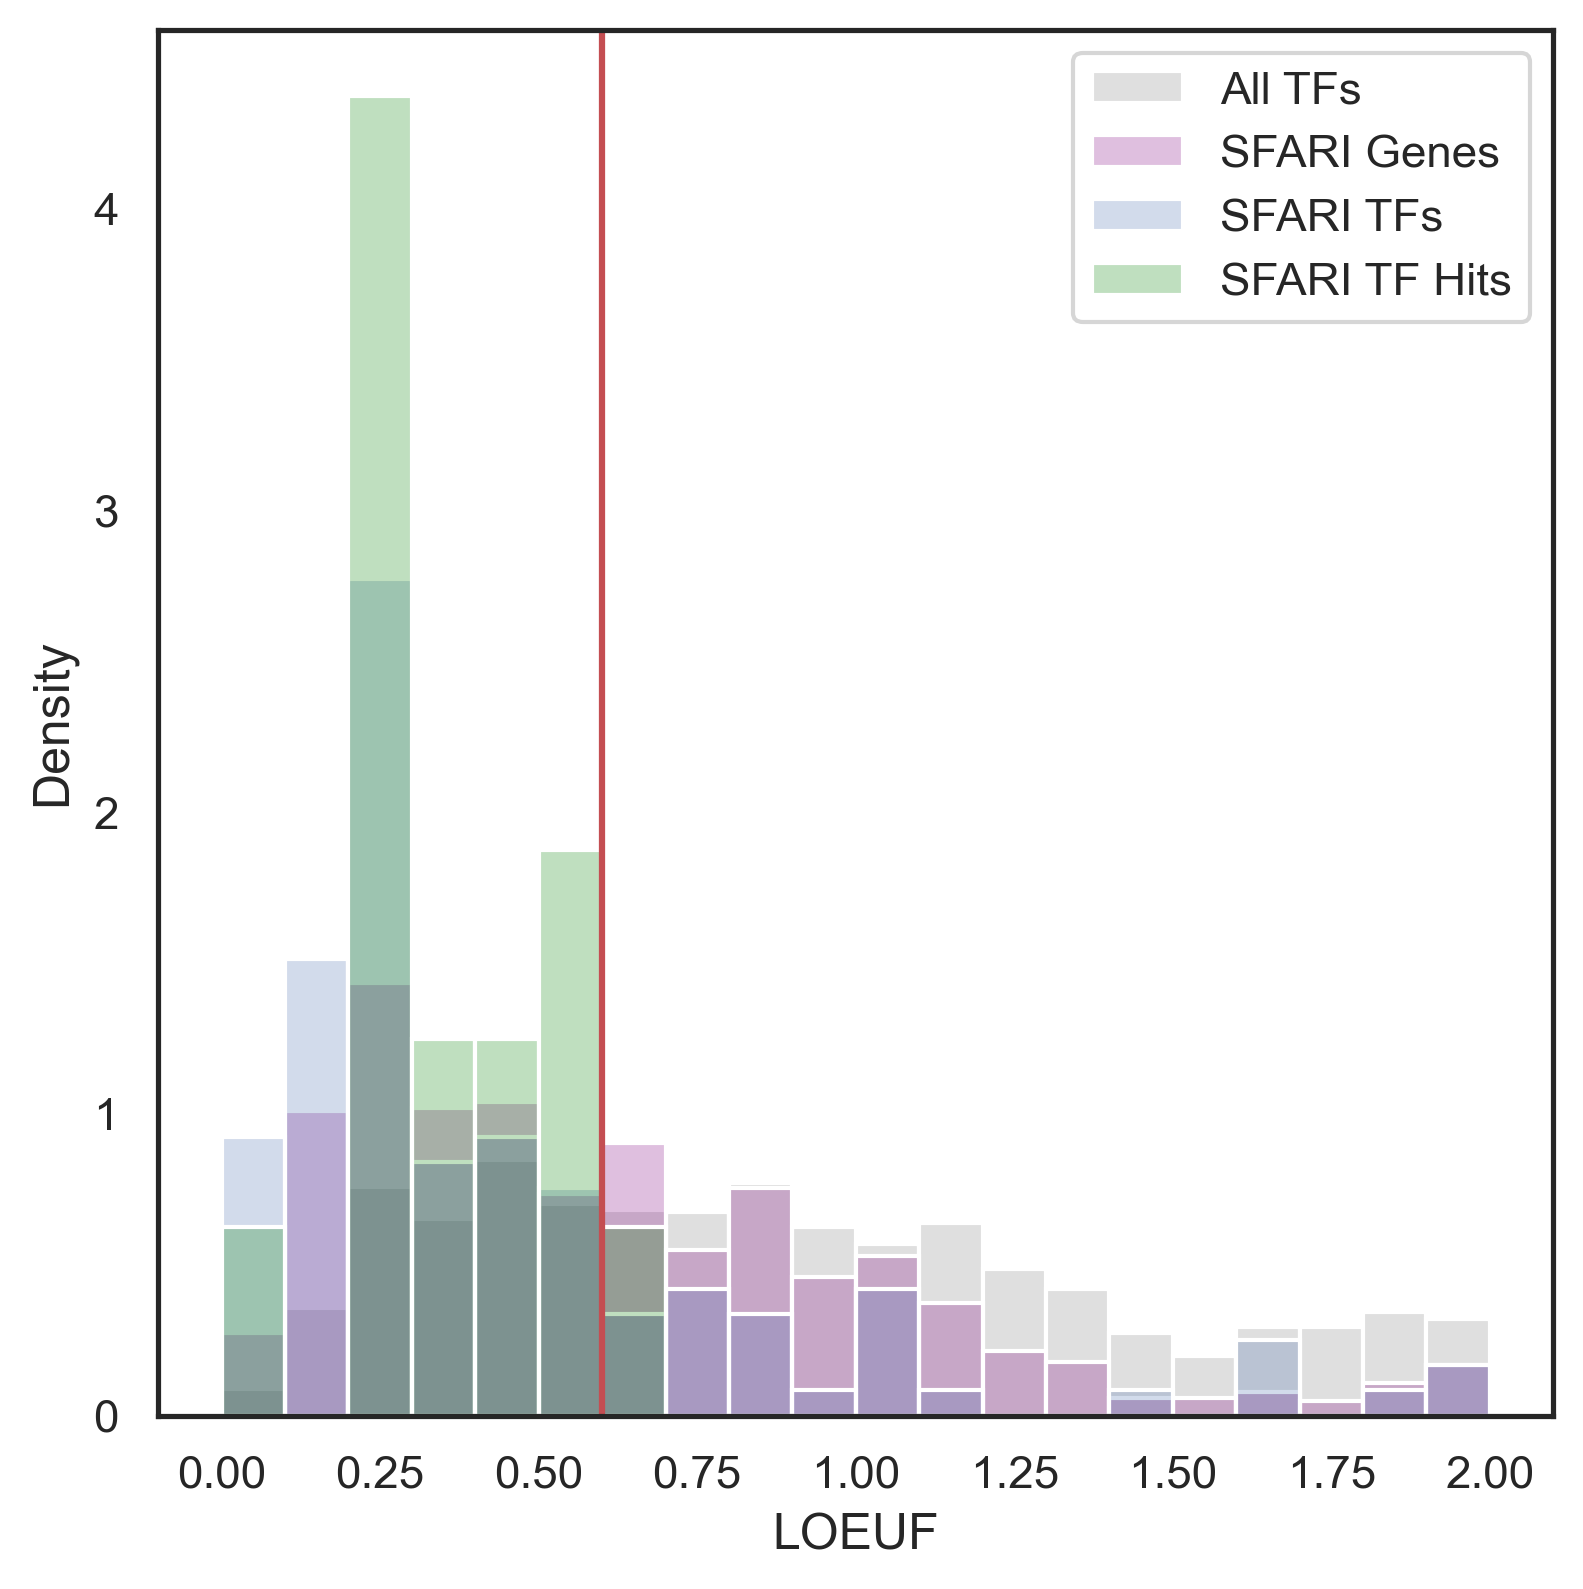

In [17]:
sns.histplot(lambert_TFs["LOEUF"], alpha = 0.25, bins = np.arange(0, 2.1, 0.1), color = "gray", stat = "density", label = "All TFs")
sns.histplot(SFARI_genes["LOEUF"], alpha = 0.25,  bins = np.arange(0, 2.1, 0.1), color = "purple", stat = "density", label = "SFARI Genes")
sns.histplot(SFARI_TFs["LOEUF"], alpha = 0.25,  bins = np.arange(0, 2.1, 0.1), color = "b", stat = "density", label = "SFARI TFs")
sns.histplot(SFARI_TF_hits["LOEUF"], alpha = 0.25,  bins = np.arange(0, 2.1, 0.1), color = 'green', stat = "density", label = "SFARI TF Hits")
plt.axvline(0.6, 0,2, color = "r")
plt.legend();


Plotting

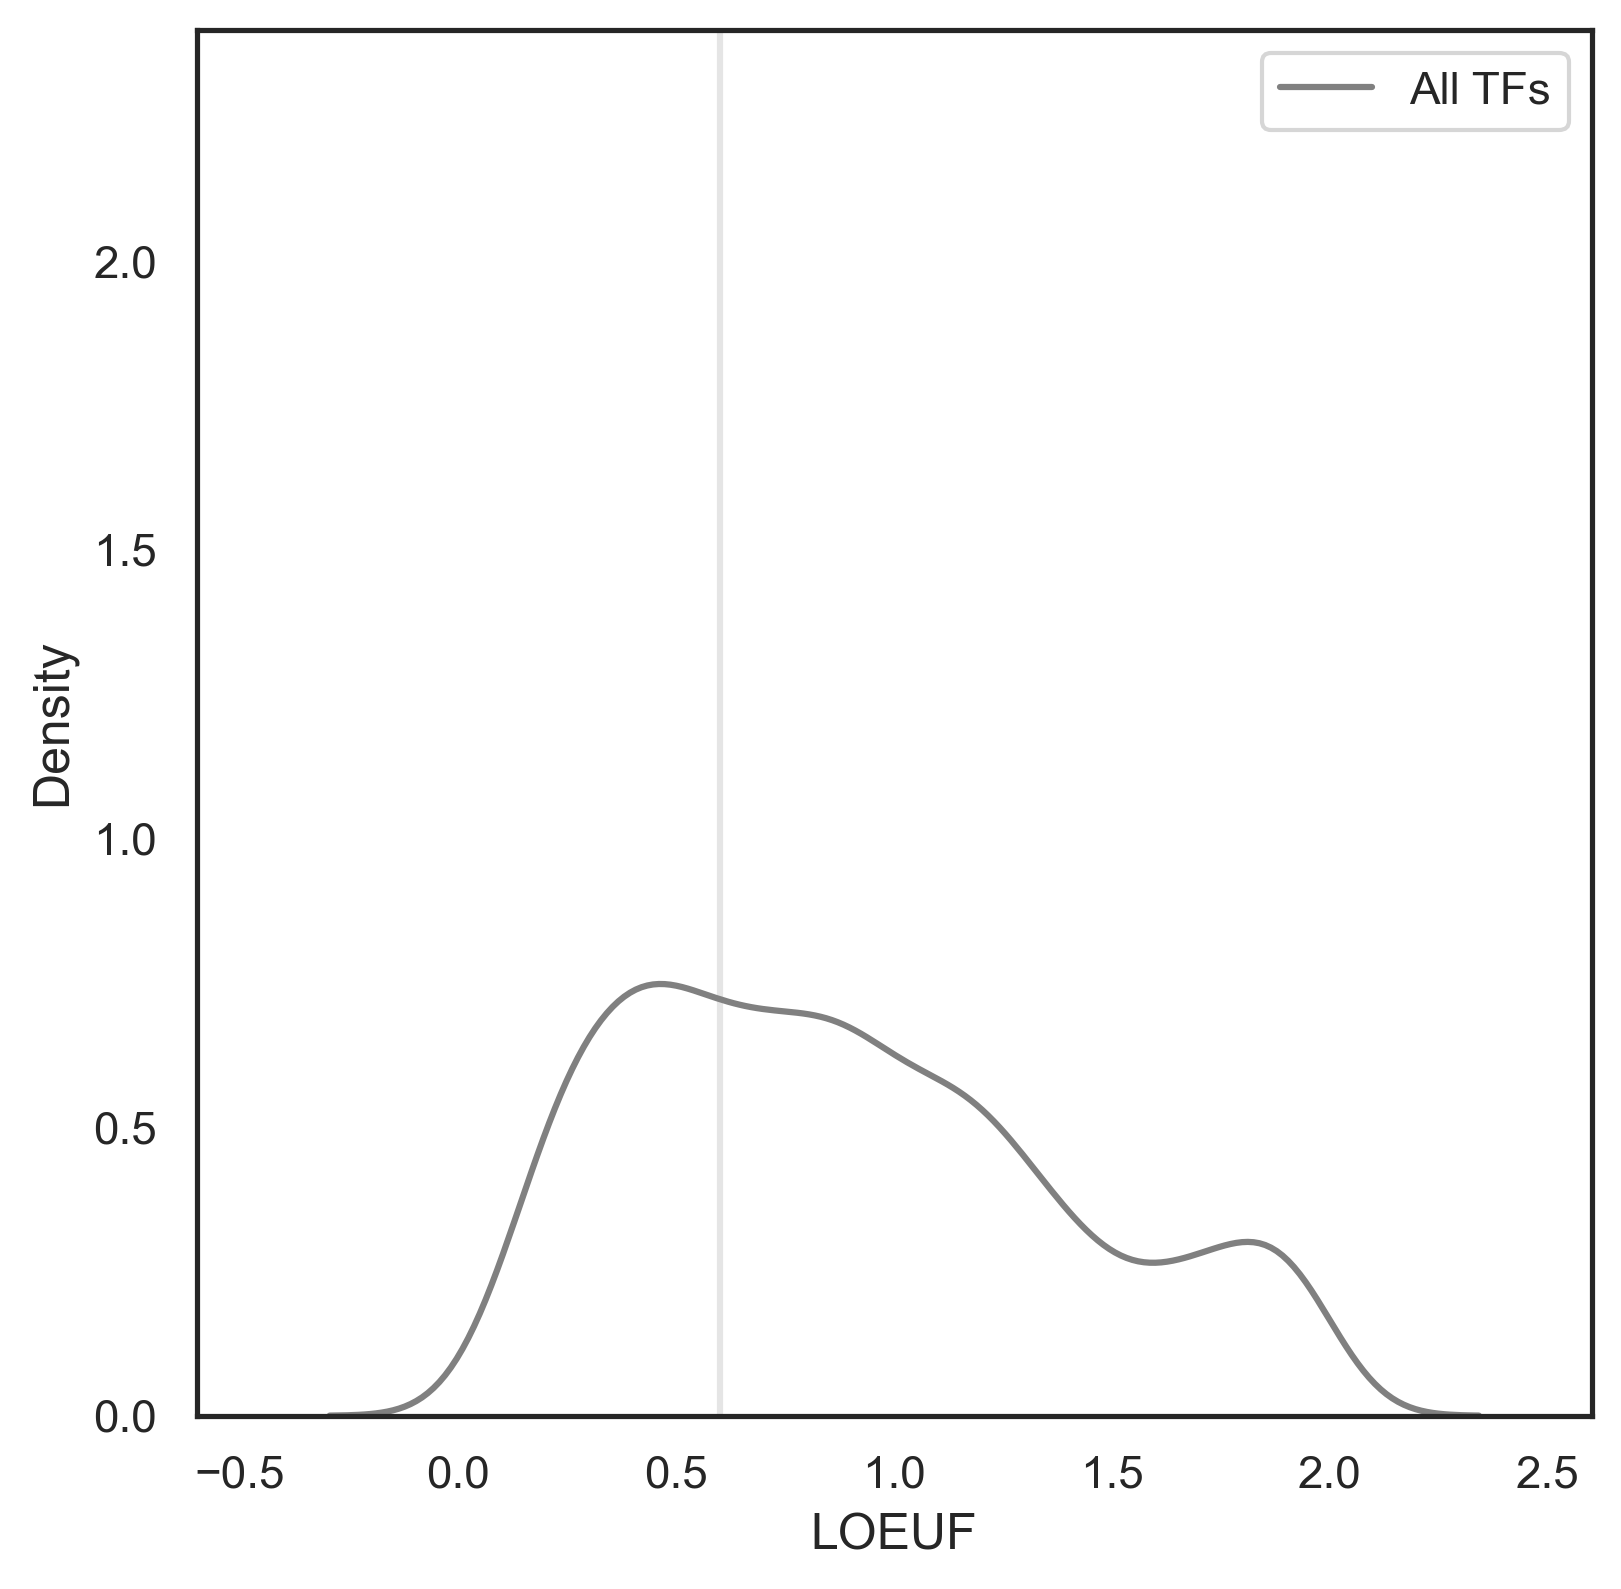

In [18]:
plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2)
plt.ylim(0, 2.4)
plt.xlim(-0.6, 2.6)
sns.kdeplot(lambert_TFs["LOEUF"], color = "gray", label = "All TFs")
plt.legend();

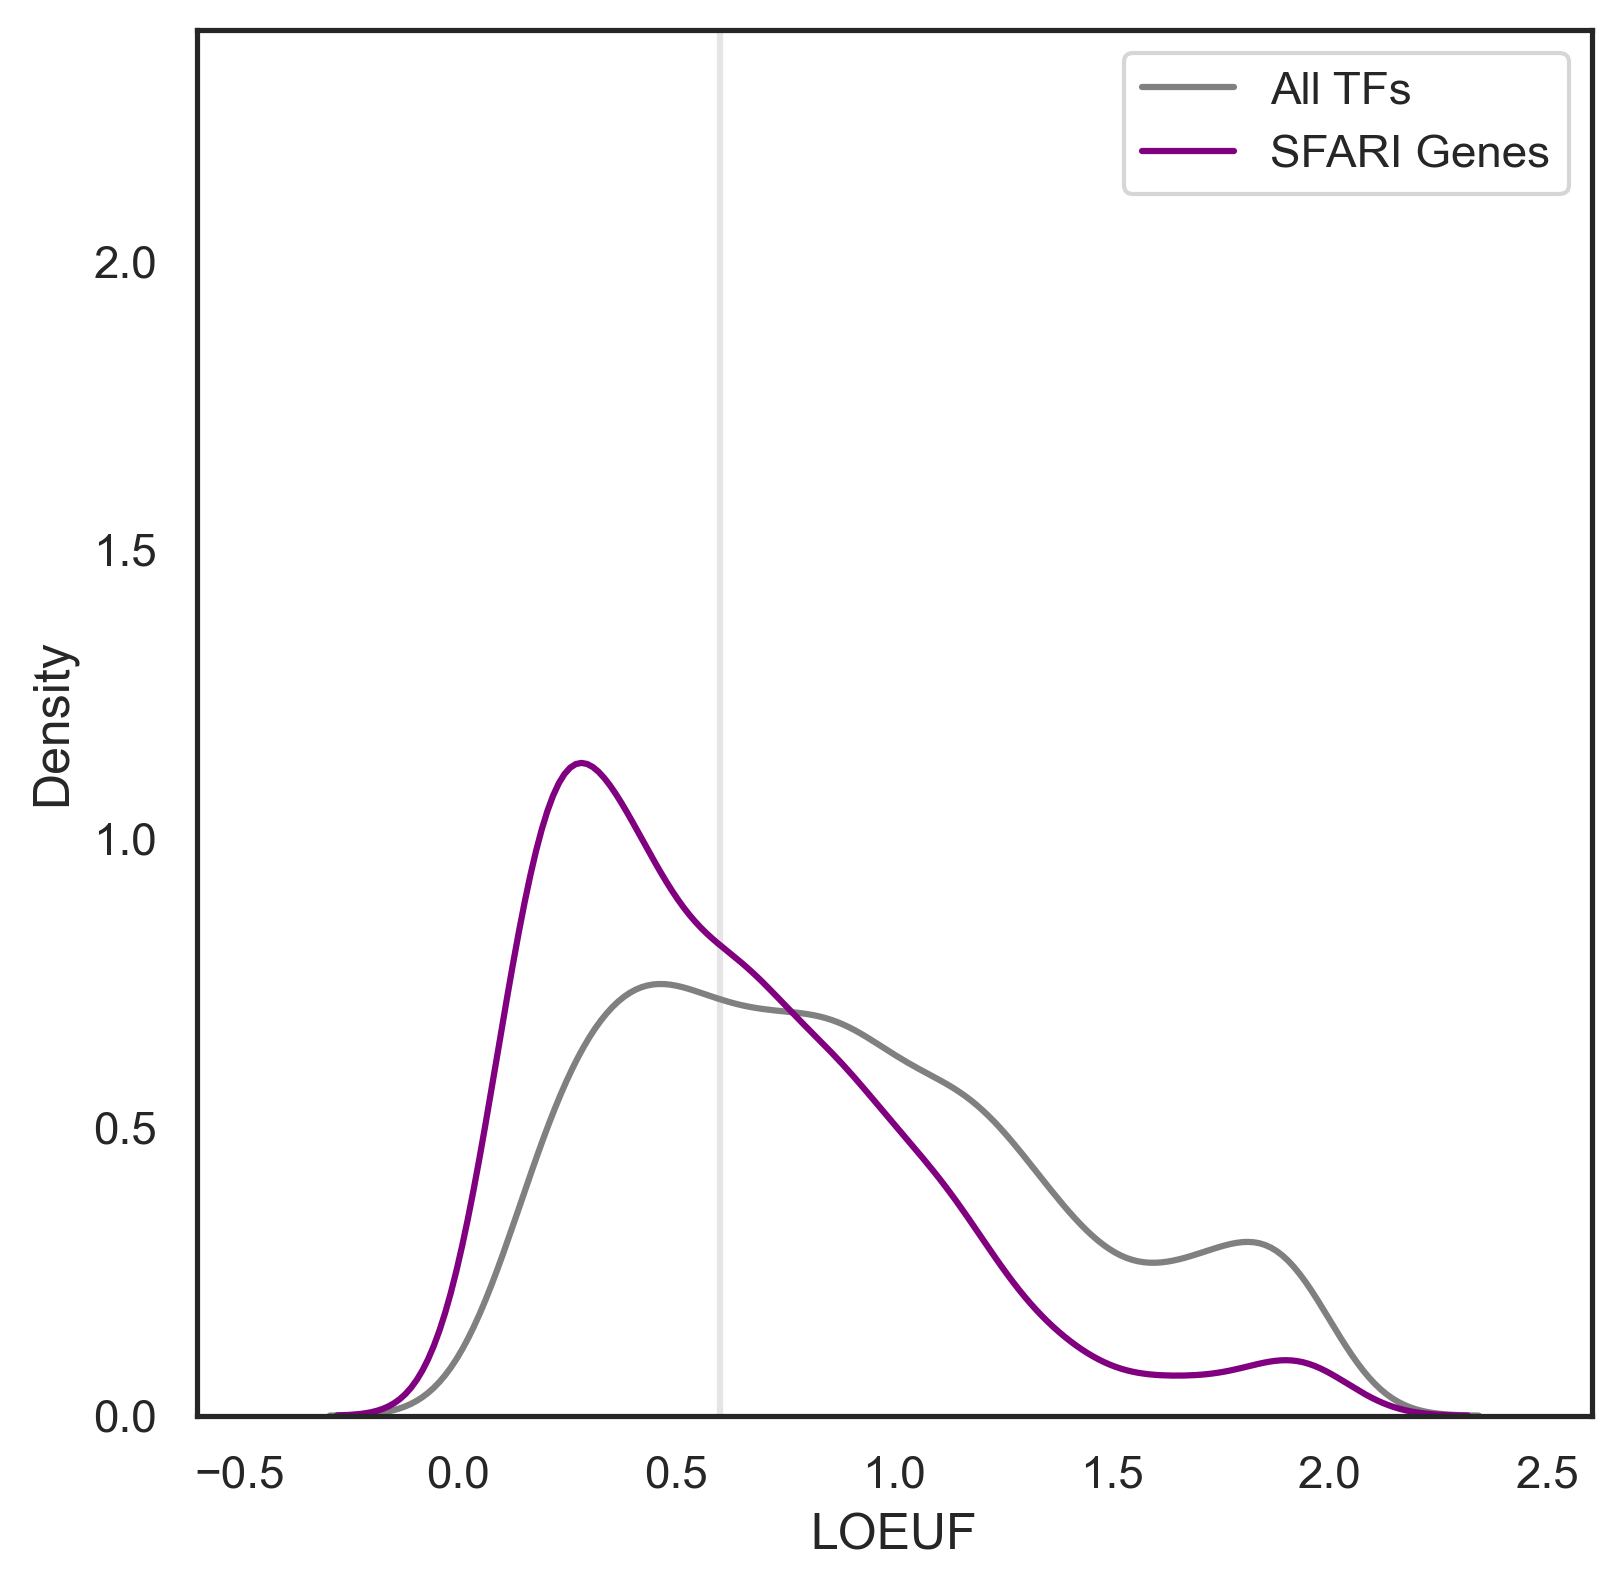

In [19]:
plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2)
plt.ylim(0, 2.4)
plt.xlim(-0.6, 2.6)
sns.kdeplot(lambert_TFs["LOEUF"], color = "gray", label = "All TFs")
sns.kdeplot(SFARI_genes["LOEUF"], color = "purple", label = "SFARI Genes")

plt.legend();

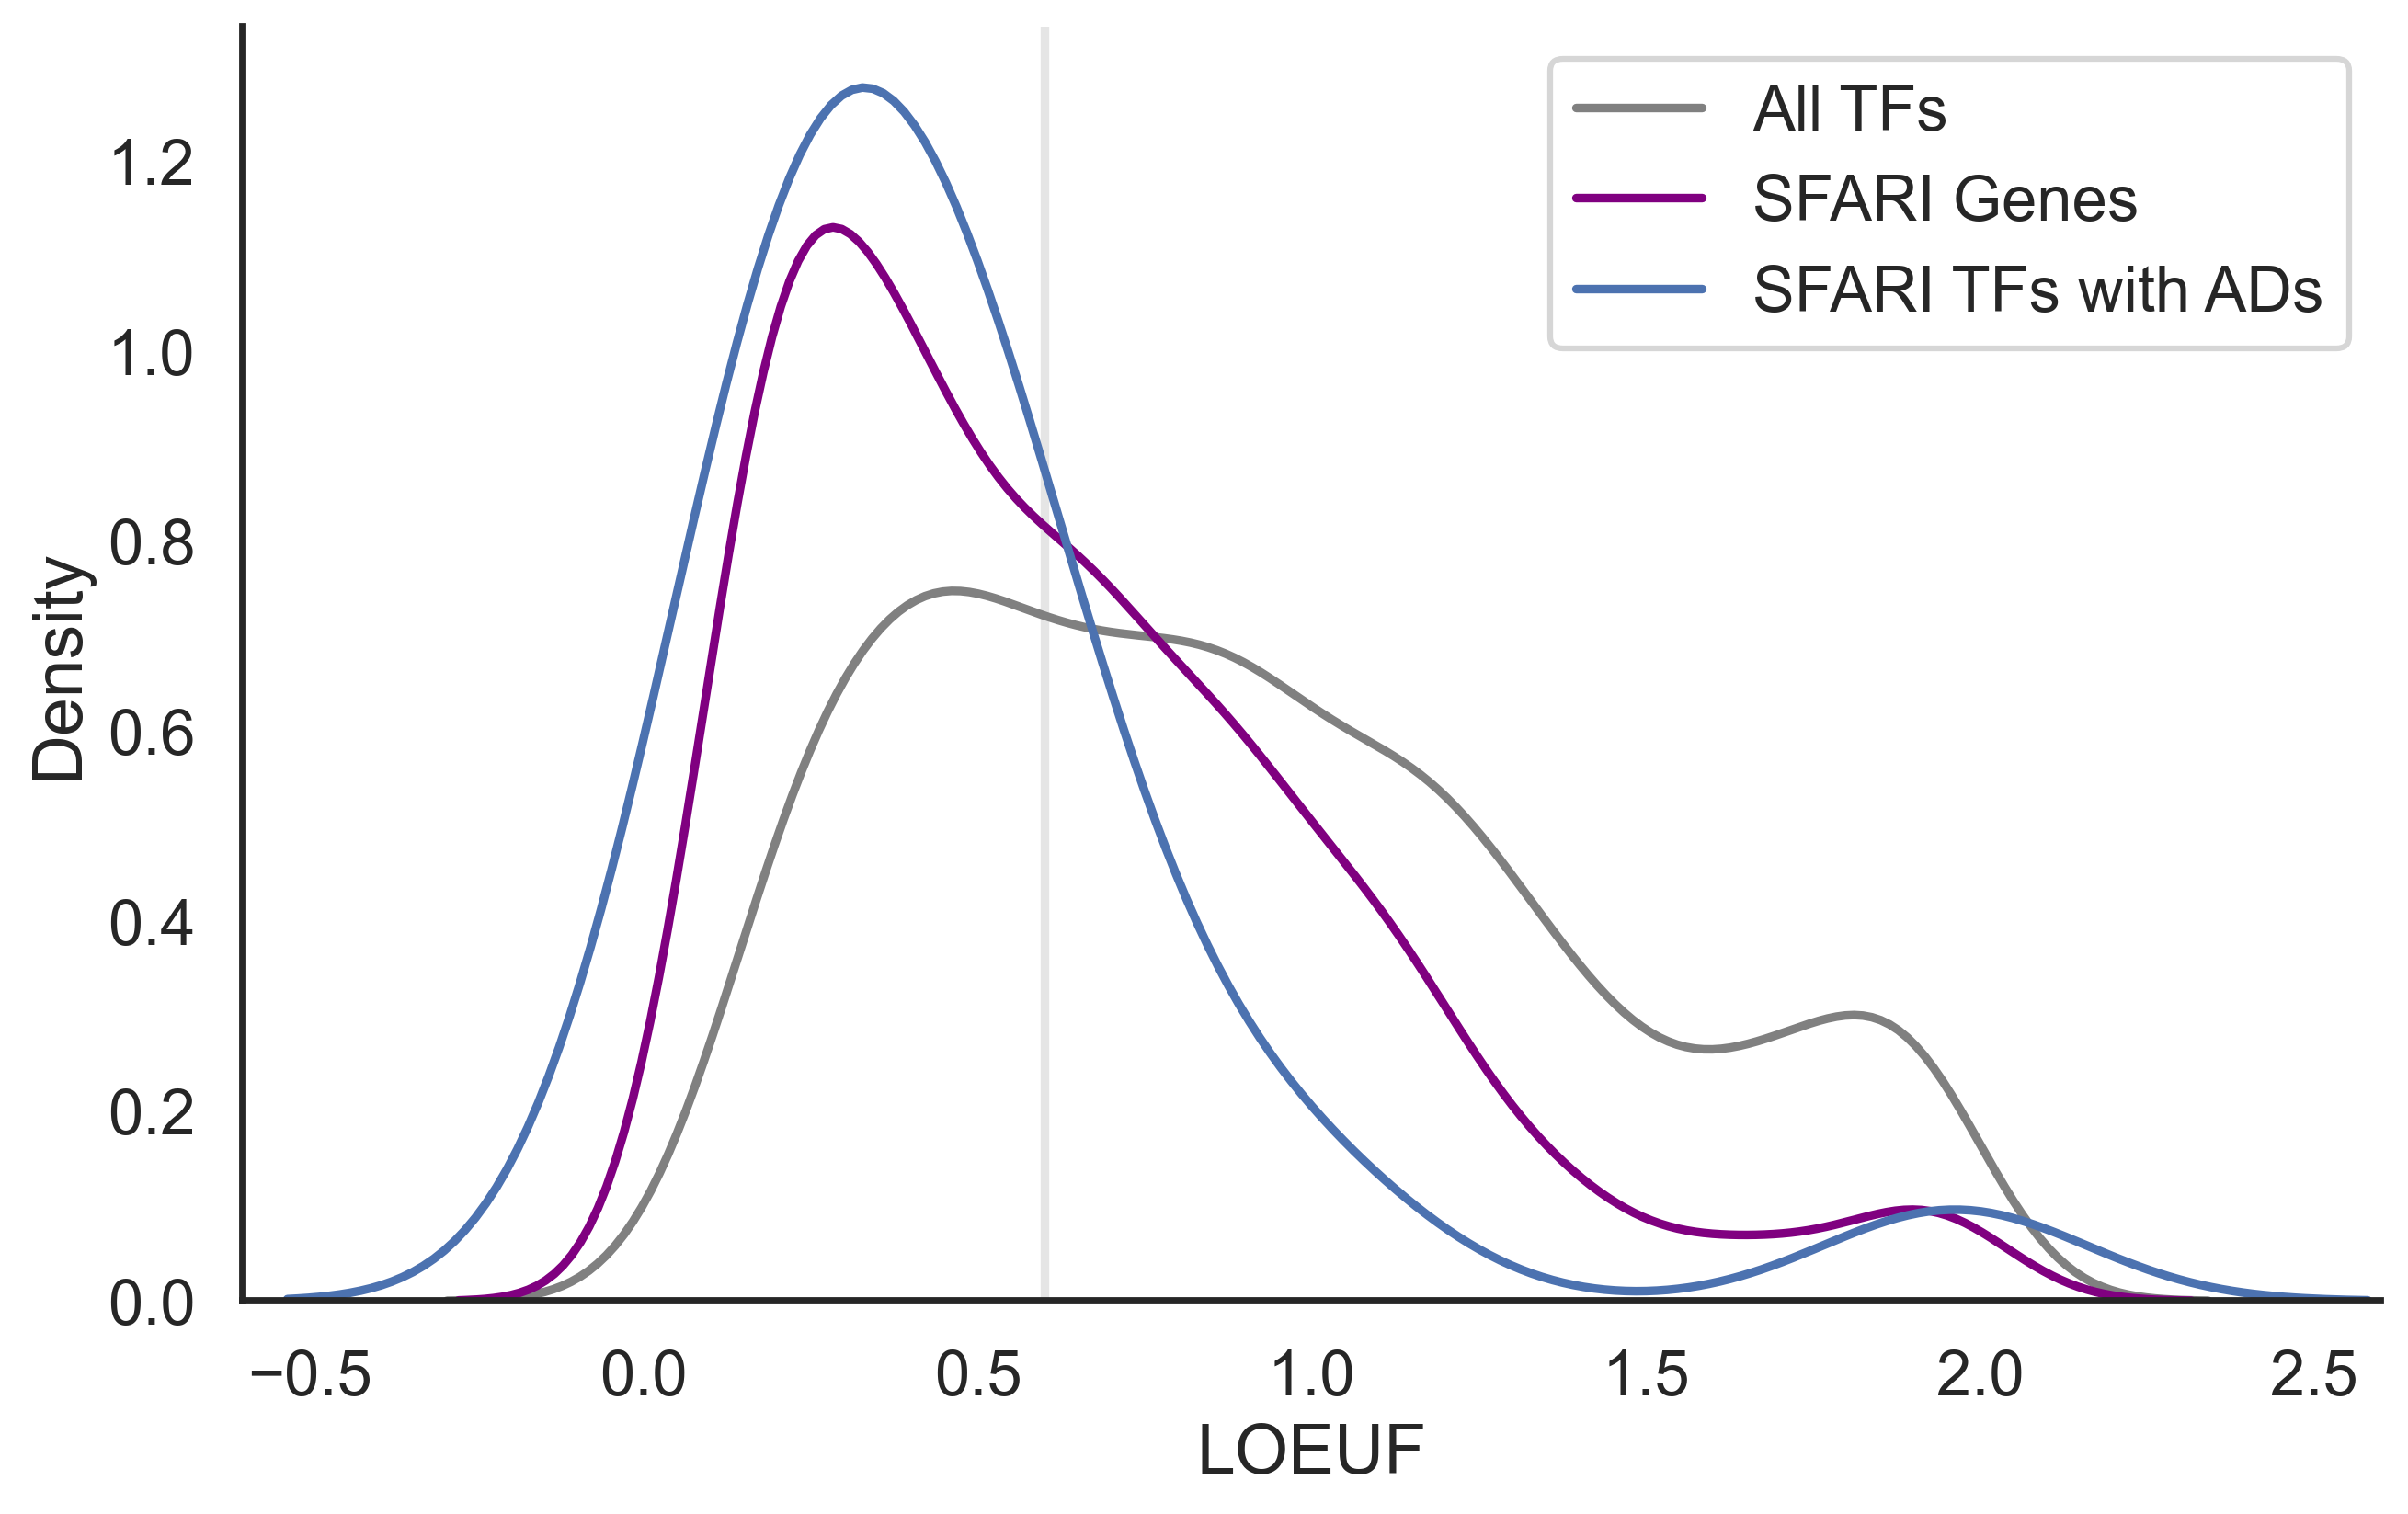

In [20]:
sns.set_context('talk')
plt.figure(figsize = (10, 6))
plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2)
#plt.ylim(0, 2.4)
plt.xlim(-0.6, 2.6)
sns.kdeplot(lambert_TFs["LOEUF"], color = "gray", label = "All TFs")
sns.kdeplot(SFARI_genes["LOEUF"], color = "purple", label = "SFARI Genes")
sns.kdeplot(SFARI_TFs_with_ADs["LOEUF"], label = "SFARI TFs with ADs")
sns.despine()
plt.legend();

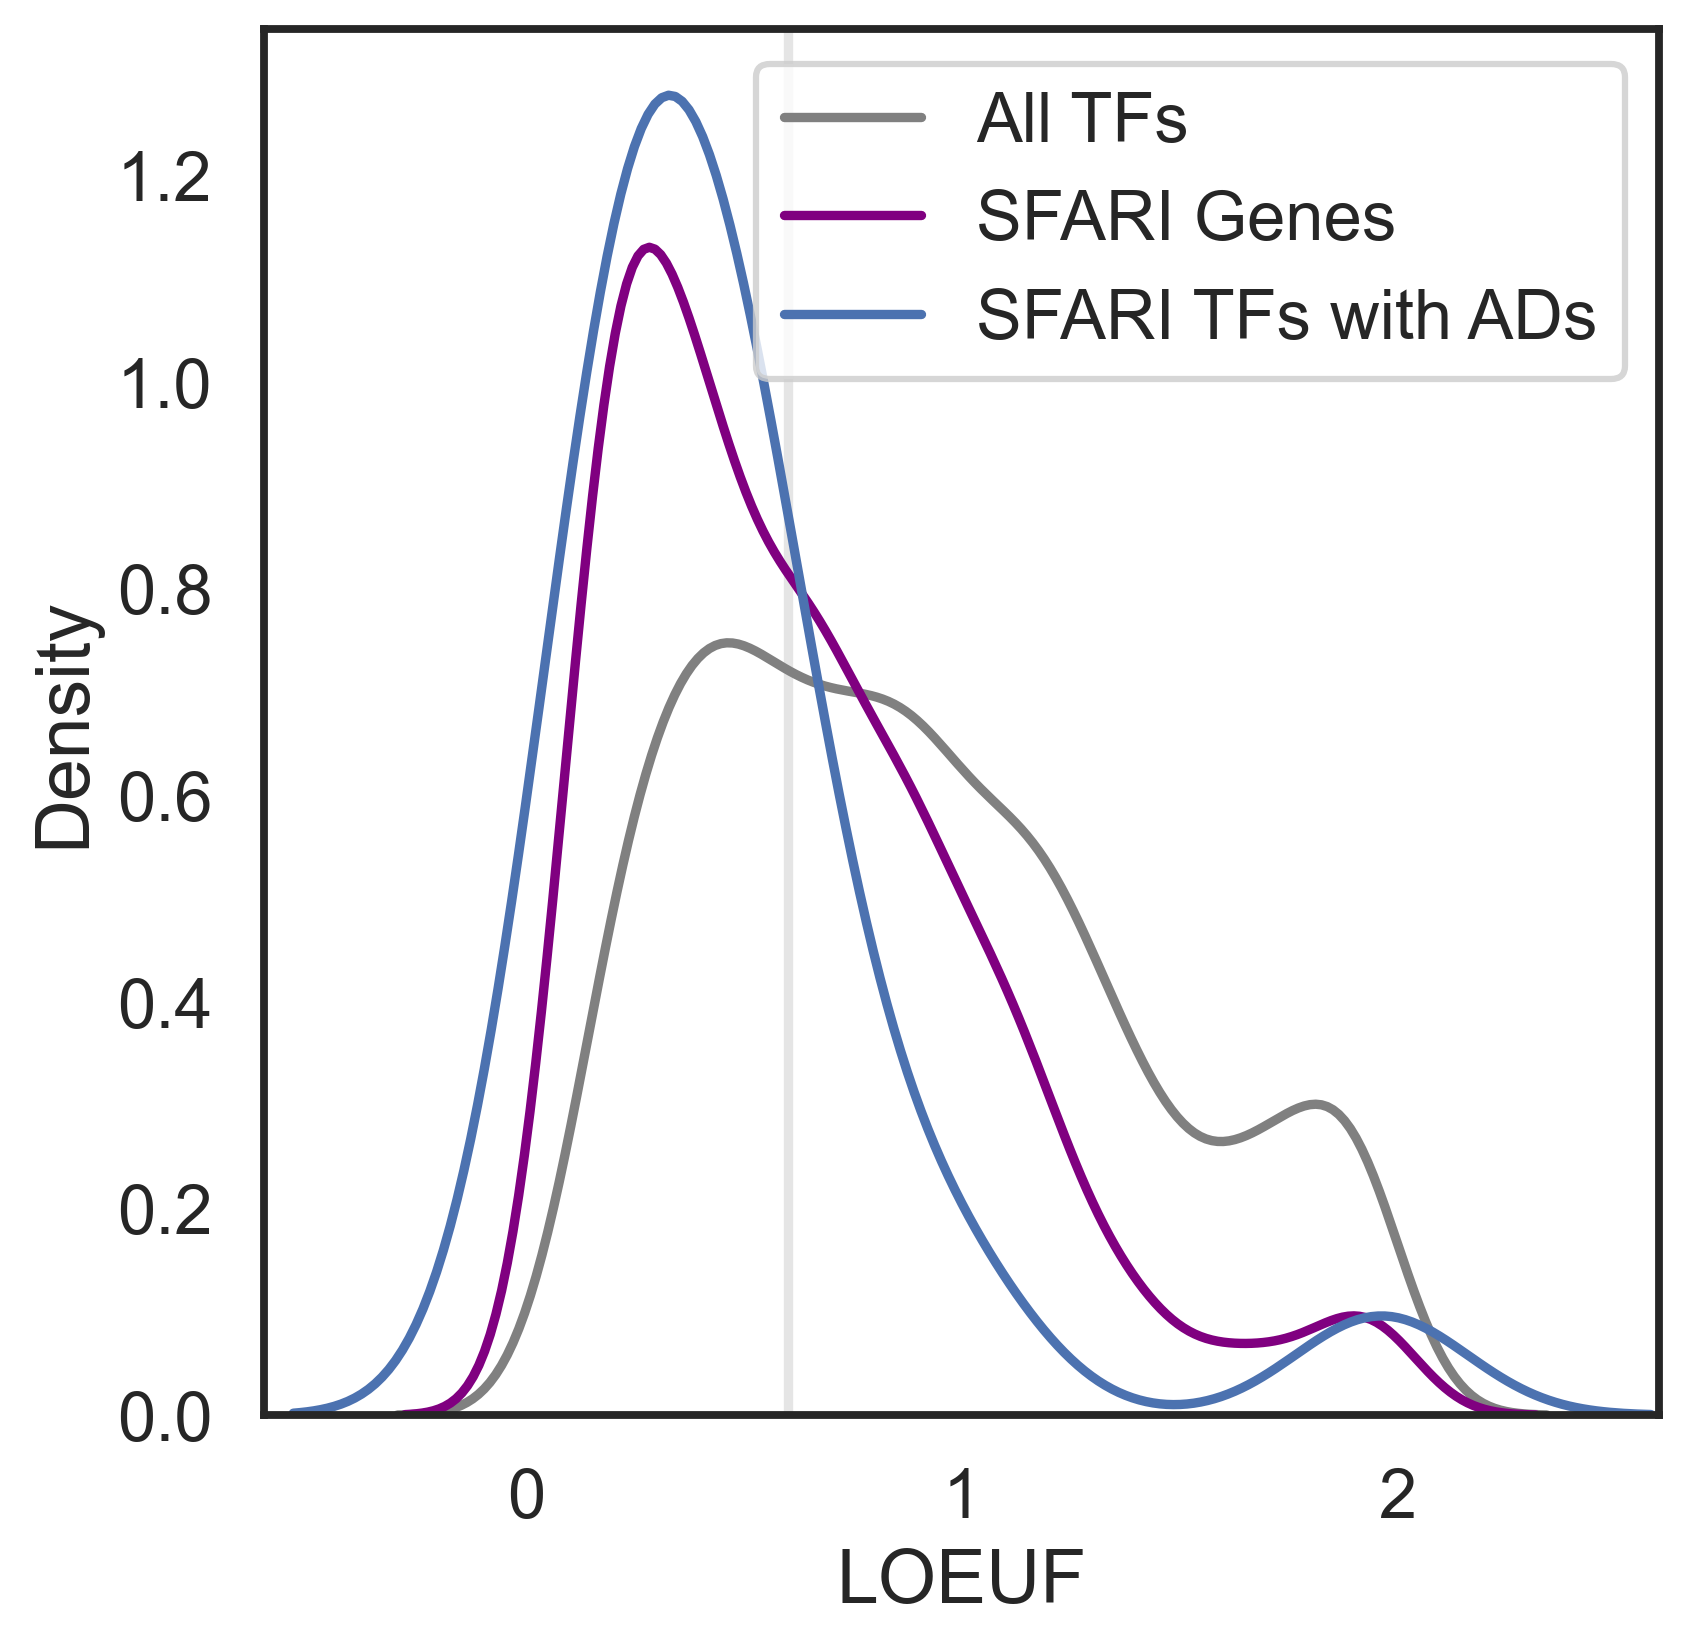

In [21]:
plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2)
#plt.ylim(0, 2.4)
plt.xlim(-0.6, 2.6)
sns.kdeplot(lambert_TFs["LOEUF"], color = "gray", label = "All TFs")
sns.kdeplot(SFARI_genes["LOEUF"], color = "purple", label = "SFARI Genes")
sns.kdeplot(SFARI_TFs_with_ADs["LOEUF"], label = "SFARI TFs with ADs")
plt.legend();

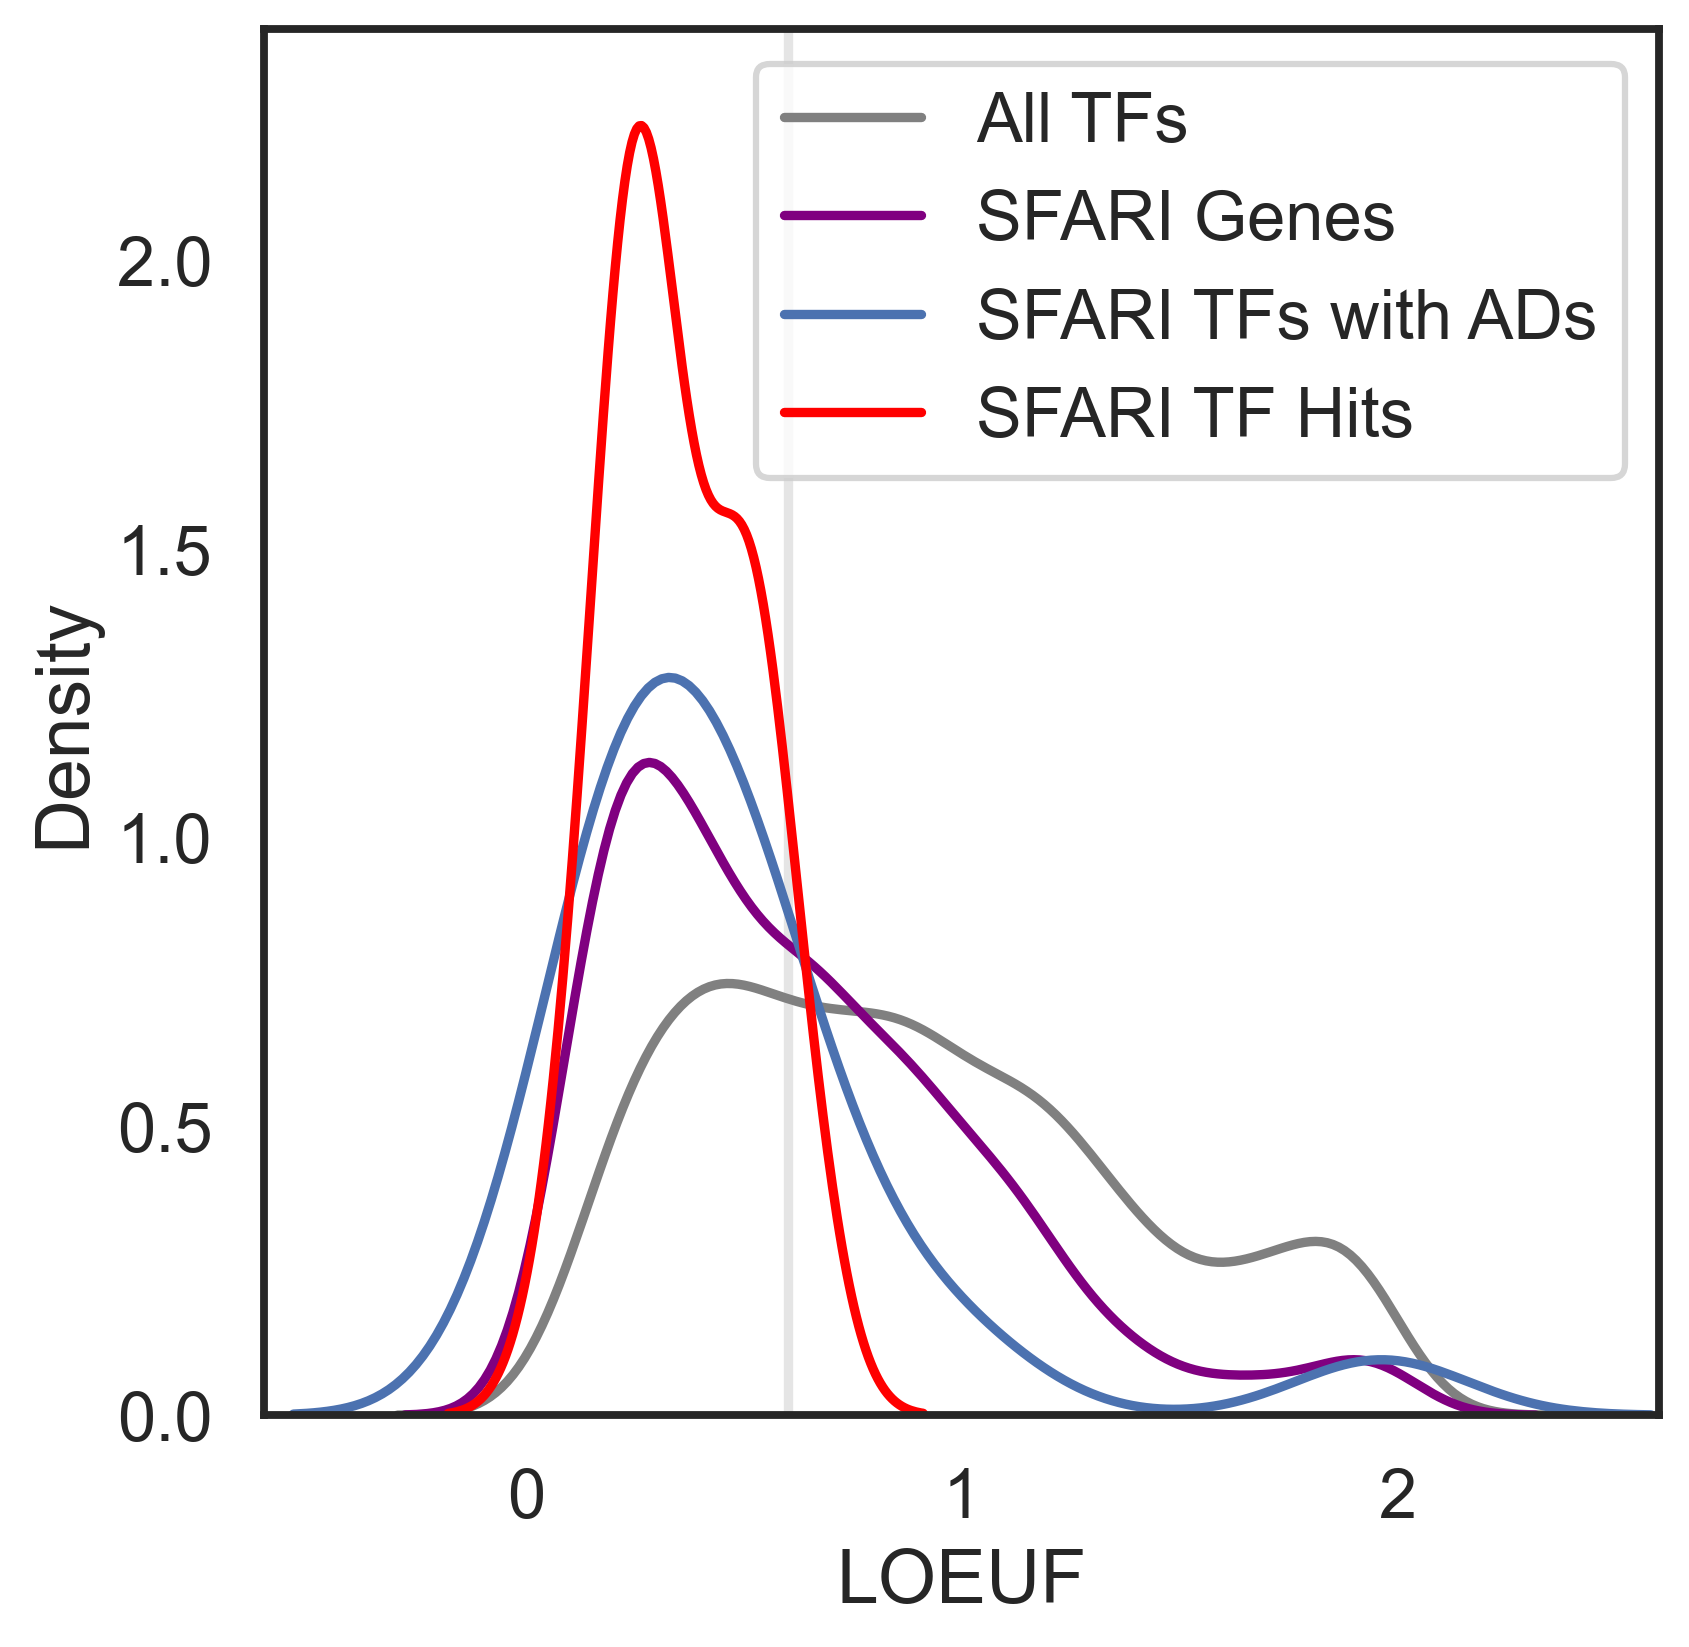

In [22]:
plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2)
plt.ylim(0, 2.4)

plt.xlim(-0.6, 2.6)
sns.kdeplot(lambert_TFs["LOEUF"], color = "gray", label = "All TFs")
sns.kdeplot(SFARI_genes["LOEUF"], color = "purple", label = "SFARI Genes")
sns.kdeplot(SFARI_TFs_with_ADs["LOEUF"], label = "SFARI TFs with ADs")
sns.kdeplot(SFARI_TF_hits["LOEUF"], color = 'red', label = "SFARI TF Hits")
plt.legend();

KS Test python

In [23]:
import numpy as np
from scipy import stats

In [24]:
stats.ks_2samp(lambert_TFs["LOEUF"], SFARI_genes["LOEUF"]).pvalue

nan

In [25]:
stats.ks_2samp(lambert_TFs["LOEUF"], SFARI_TFs_with_ADs["LOEUF"]).pvalue

nan

In [26]:
stats.ks_2samp(lambert_TFs["LOEUF"], SFARI_TF_hits["LOEUF"]).pvalue

nan

In [27]:
stats.ks_2samp(SFARI_genes["LOEUF"], SFARI_TFs_with_ADs["LOEUF"]).pvalue

nan

In [28]:
stats.ks_2samp(SFARI_genes["LOEUF"], SFARI_TF_hits["LOEUF"]).pvalue

nan

In [29]:
stats.ks_2samp(SFARI_TFs_with_ADs["LOEUF"], SFARI_TF_hits["LOEUF"]).pvalue

nan

In [30]:
0.05 / 6

0.008333333333333333

---
## Adding alpha missense gene constraint scores

Downloaded here: https://zenodo.org/records/10813168

In [31]:
alphamissense_gene = pd.read_csv("../data/AlphaMissense_gene_hg38.tsv", sep = "\t", header = 3)
alphamissense_gene["transcript"] = alphamissense_gene["transcript_id"].str.split(".").str[0]
alphamissense_gene

,transcript_id,mean_am_pathogenicity,transcript
0,ENST00000000233.10,0.742270,ENST00000000233
1,ENST00000000412.8,0.378343,ENST00000000412
2,ENST00000001008.6,0.422290,ENST00000001008
3,ENST00000001146.6,0.466606,ENST00000001146
4,ENST00000002125.9,0.351480,ENST00000002125
...,...,...,...
19228,ENST00000673386.1,0.209559,ENST00000673386
19229,ENST00000673439.1,0.349771,ENST00000673439
19230,ENST00000673466.1,0.669078,ENST00000673466
19231,ENST00000673477.1,0.287994,ENST00000673477


In [32]:
lambert_TFs

,gene_id,gene,LOEUF,transcript
0,ENSG00000137203,TFAP2A,0.334,ENST00000379613
1,ENSG00000008196,TFAP2B,0.353,ENST00000393655
2,ENSG00000087510,TFAP2C,0.417,ENST00000201031
3,ENSG00000008197,TFAP2D,0.389,ENST00000008391
4,ENSG00000116819,TFAP2E,1.418,ENST00000373235
...,...,...,...,...
1634,ENSG00000177683,THAP5,1.089,ENST00000415914
1635,ENSG00000174796,THAP6,1.028,ENST00000311638
1636,ENSG00000184436,THAP7,1.147,ENST00000215742
1637,ENSG00000161277,THAP8,1.615,ENST00000292894


In [33]:
lambert_TFs = pd.merge(lambert_TFs, alphamissense_gene, on = "transcript")
lambert_TFs

,gene_id,gene,LOEUF,transcript,transcript_id,mean_am_pathogenicity
0,ENSG00000008196,TFAP2B,0.353,ENST00000393655,ENST00000393655.4,0.614557
1,ENSG00000087510,TFAP2C,0.417,ENST00000201031,ENST00000201031.3,0.465959
2,ENSG00000008197,TFAP2D,0.389,ENST00000008391,ENST00000008391.3,0.536534
3,ENSG00000116819,TFAP2E,1.418,ENST00000373235,ENST00000373235.4,0.504094
4,ENSG00000116017,ARID3A,0.442,ENST00000263620,ENST00000263620.8,0.407205
...,...,...,...,...,...,...
1053,ENSG00000041988,THAP3,1.241,ENST00000054650,ENST00000054650.8,0.375345
1054,ENSG00000176946,THAP4,0.585,ENST00000407315,ENST00000407315.6,0.404626
1055,ENSG00000177683,THAP5,1.089,ENST00000415914,ENST00000415914.4,0.287857
1056,ENSG00000161277,THAP8,1.615,ENST00000292894,ENST00000292894.2,0.287022


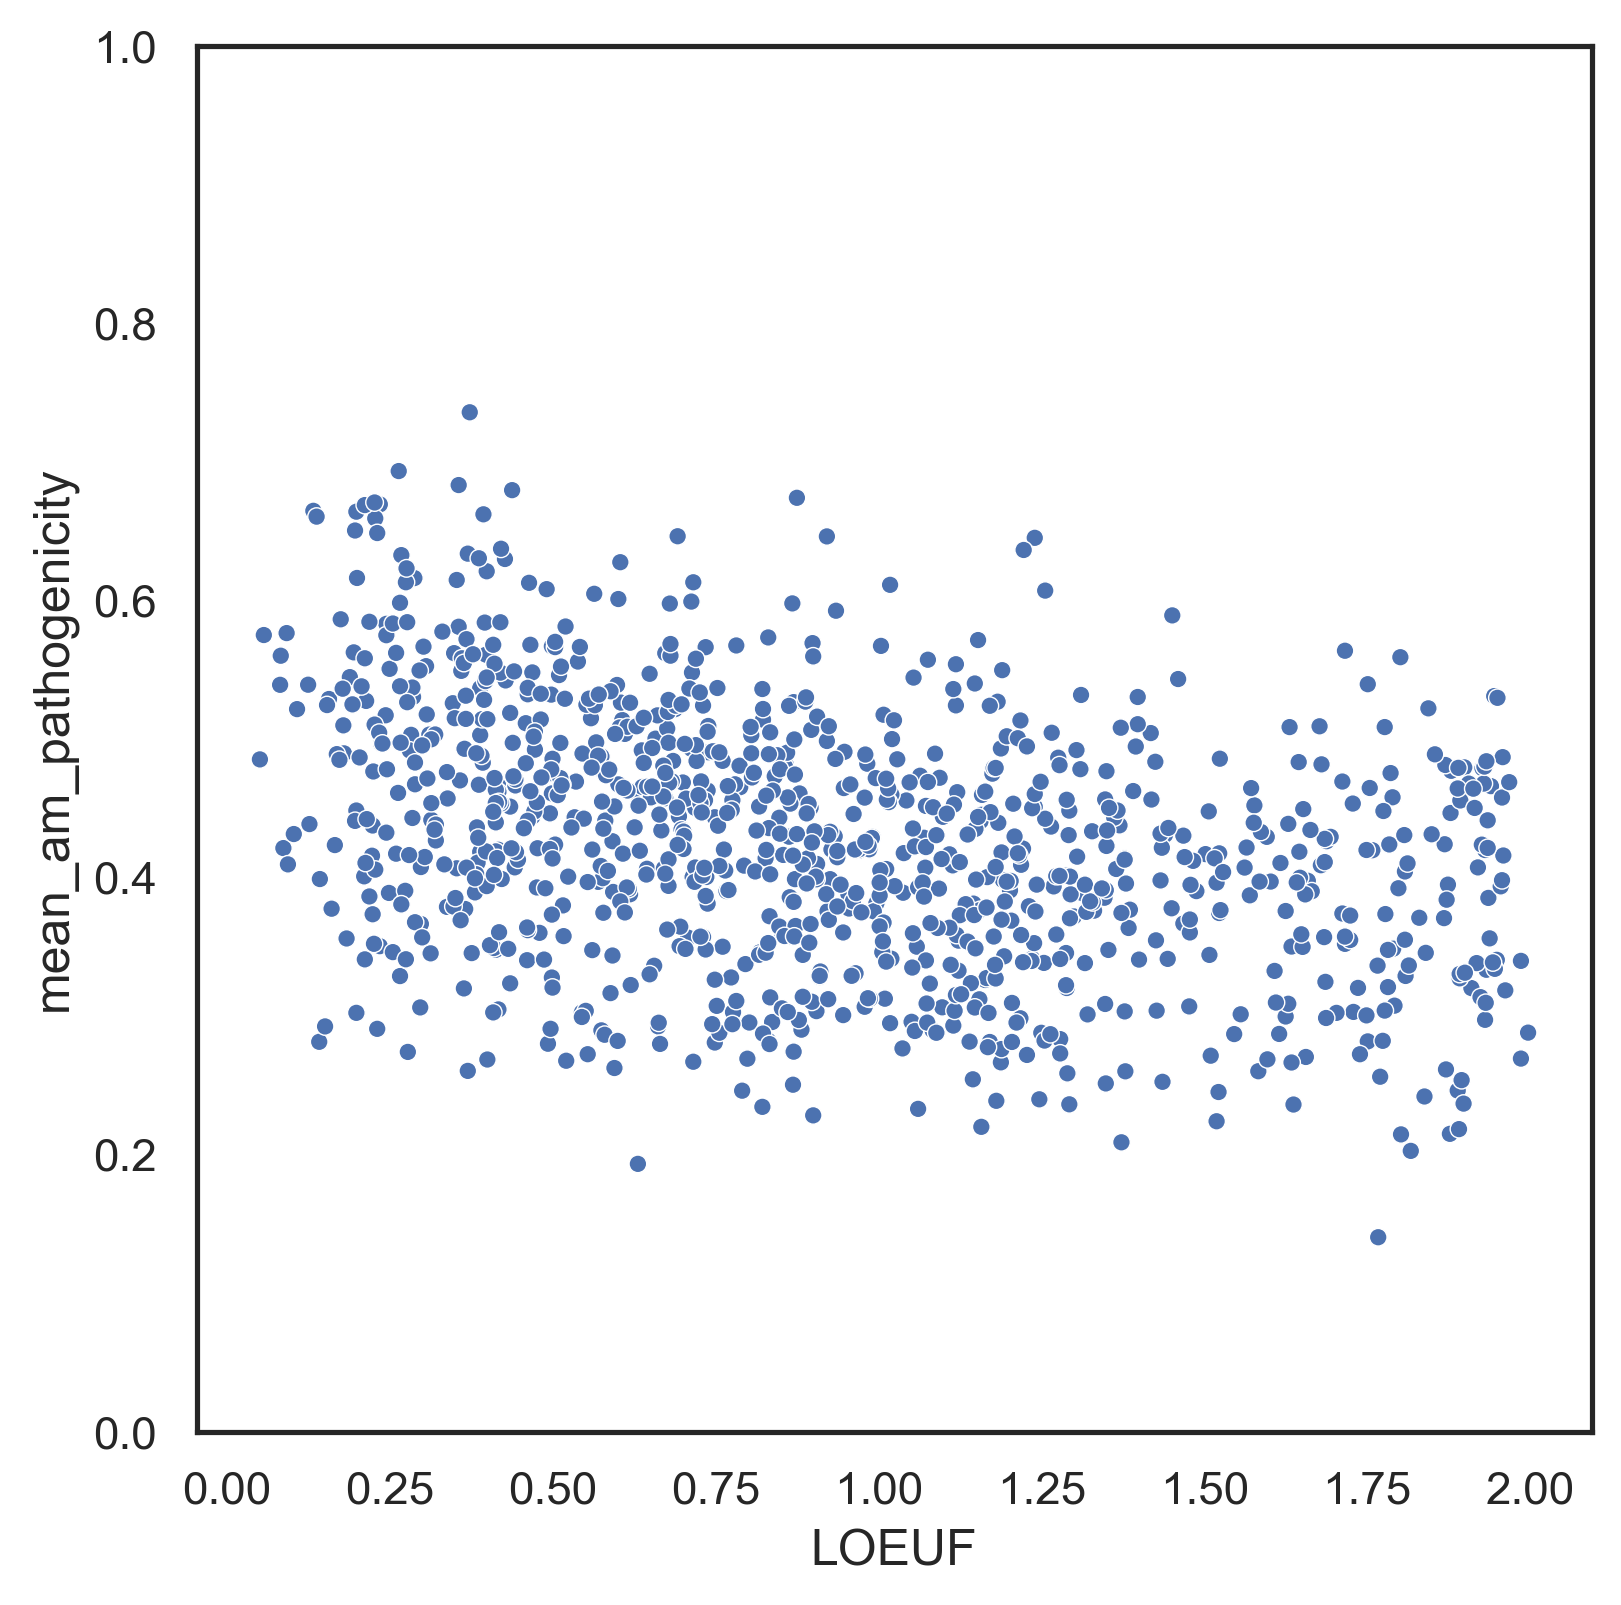

In [34]:
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.set_style("white")
plt.ylim(0, 1)
sns.scatterplot(data = lambert_TFs, x = "LOEUF", y = "mean_am_pathogenicity", size = 0.1, legend = False);

In [35]:
# Running into same issue

In [36]:
SFARI_TF_hits

,gene_id,gene,LOEUF,transcript
100,ENSG00000084676,NCOA1,0.298,ENST00000348332
215,ENSG00000130940,CASZ1,0.285,ENST00000377022
252,ENSG00000185811,IKZF1,0.320,ENST00000331340
346,ENSG00000100811,YY1,0.200,ENST00000262238
976,ENSG00000108509,CAMTA2,0.512,ENST00000348066
1033,ENSG00000157554,ERG,0.234,ENST00000288319
1153,ENSG00000148737,TCF7L2,0.474,ENST00000627217
1161,ENSG00000004848,ARX,NaN,NaN
1272,ENSG00000134138,MEIS2,0.255,ENST00000561208
1287,ENSG00000125820,NKX2-2,0.640,ENST00000377142


In [37]:
lambert_TFs["SFARI_TF_with_AD"] = [_ in list(SFARI_TFs_with_ADs['gene_id']) for _ in lambert_TFs["gene_id"]]
lambert_TFs["SFARI_TF_hit"] = [_ in list(SFARI_TF_hits['gene_id']) for _ in lambert_TFs["gene_id"]]
#lambert_TFs["Category"] = lambert_TFs["SFARI_TF_hit"].map({False:"TF",True:"SFARI TF Hit"})

categories = []
for i in lambert_TFs.index:
    row = lambert_TFs.iloc[i]
    if row["SFARI_TF_hit"]:
        categories.append("SFARI TF Hit")
    elif row["SFARI_TF_with_AD"]:
        categories.append("SFARI_TF with AD")
    else:
        categories.append("TF")
        
lambert_TFs["Category"] = categories
lambert_TFs

,gene_id,gene,LOEUF,transcript,transcript_id,mean_am_pathogenicity,SFARI_TF_with_AD,SFARI_TF_hit,Category
0,ENSG00000008196,TFAP2B,0.353,ENST00000393655,ENST00000393655.4,0.614557,False,False,TF
1,ENSG00000087510,TFAP2C,0.417,ENST00000201031,ENST00000201031.3,0.465959,False,False,TF
2,ENSG00000008197,TFAP2D,0.389,ENST00000008391,ENST00000008391.3,0.536534,False,False,TF
3,ENSG00000116819,TFAP2E,1.418,ENST00000373235,ENST00000373235.4,0.504094,False,False,TF
4,ENSG00000116017,ARID3A,0.442,ENST00000263620,ENST00000263620.8,0.407205,False,False,TF
...,...,...,...,...,...,...,...,...,...
1053,ENSG00000041988,THAP3,1.241,ENST00000054650,ENST00000054650.8,0.375345,False,False,TF
1054,ENSG00000176946,THAP4,0.585,ENST00000407315,ENST00000407315.6,0.404626,False,False,TF
1055,ENSG00000177683,THAP5,1.089,ENST00000415914,ENST00000415914.4,0.287857,False,False,TF
1056,ENSG00000161277,THAP8,1.615,ENST00000292894,ENST00000292894.2,0.287022,False,False,TF


In [38]:
import scipy as sp

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_21526/2958546760.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = lambert_TFs, x = "LOEUF", y = "mean_am_pathogenicity", legend = True,


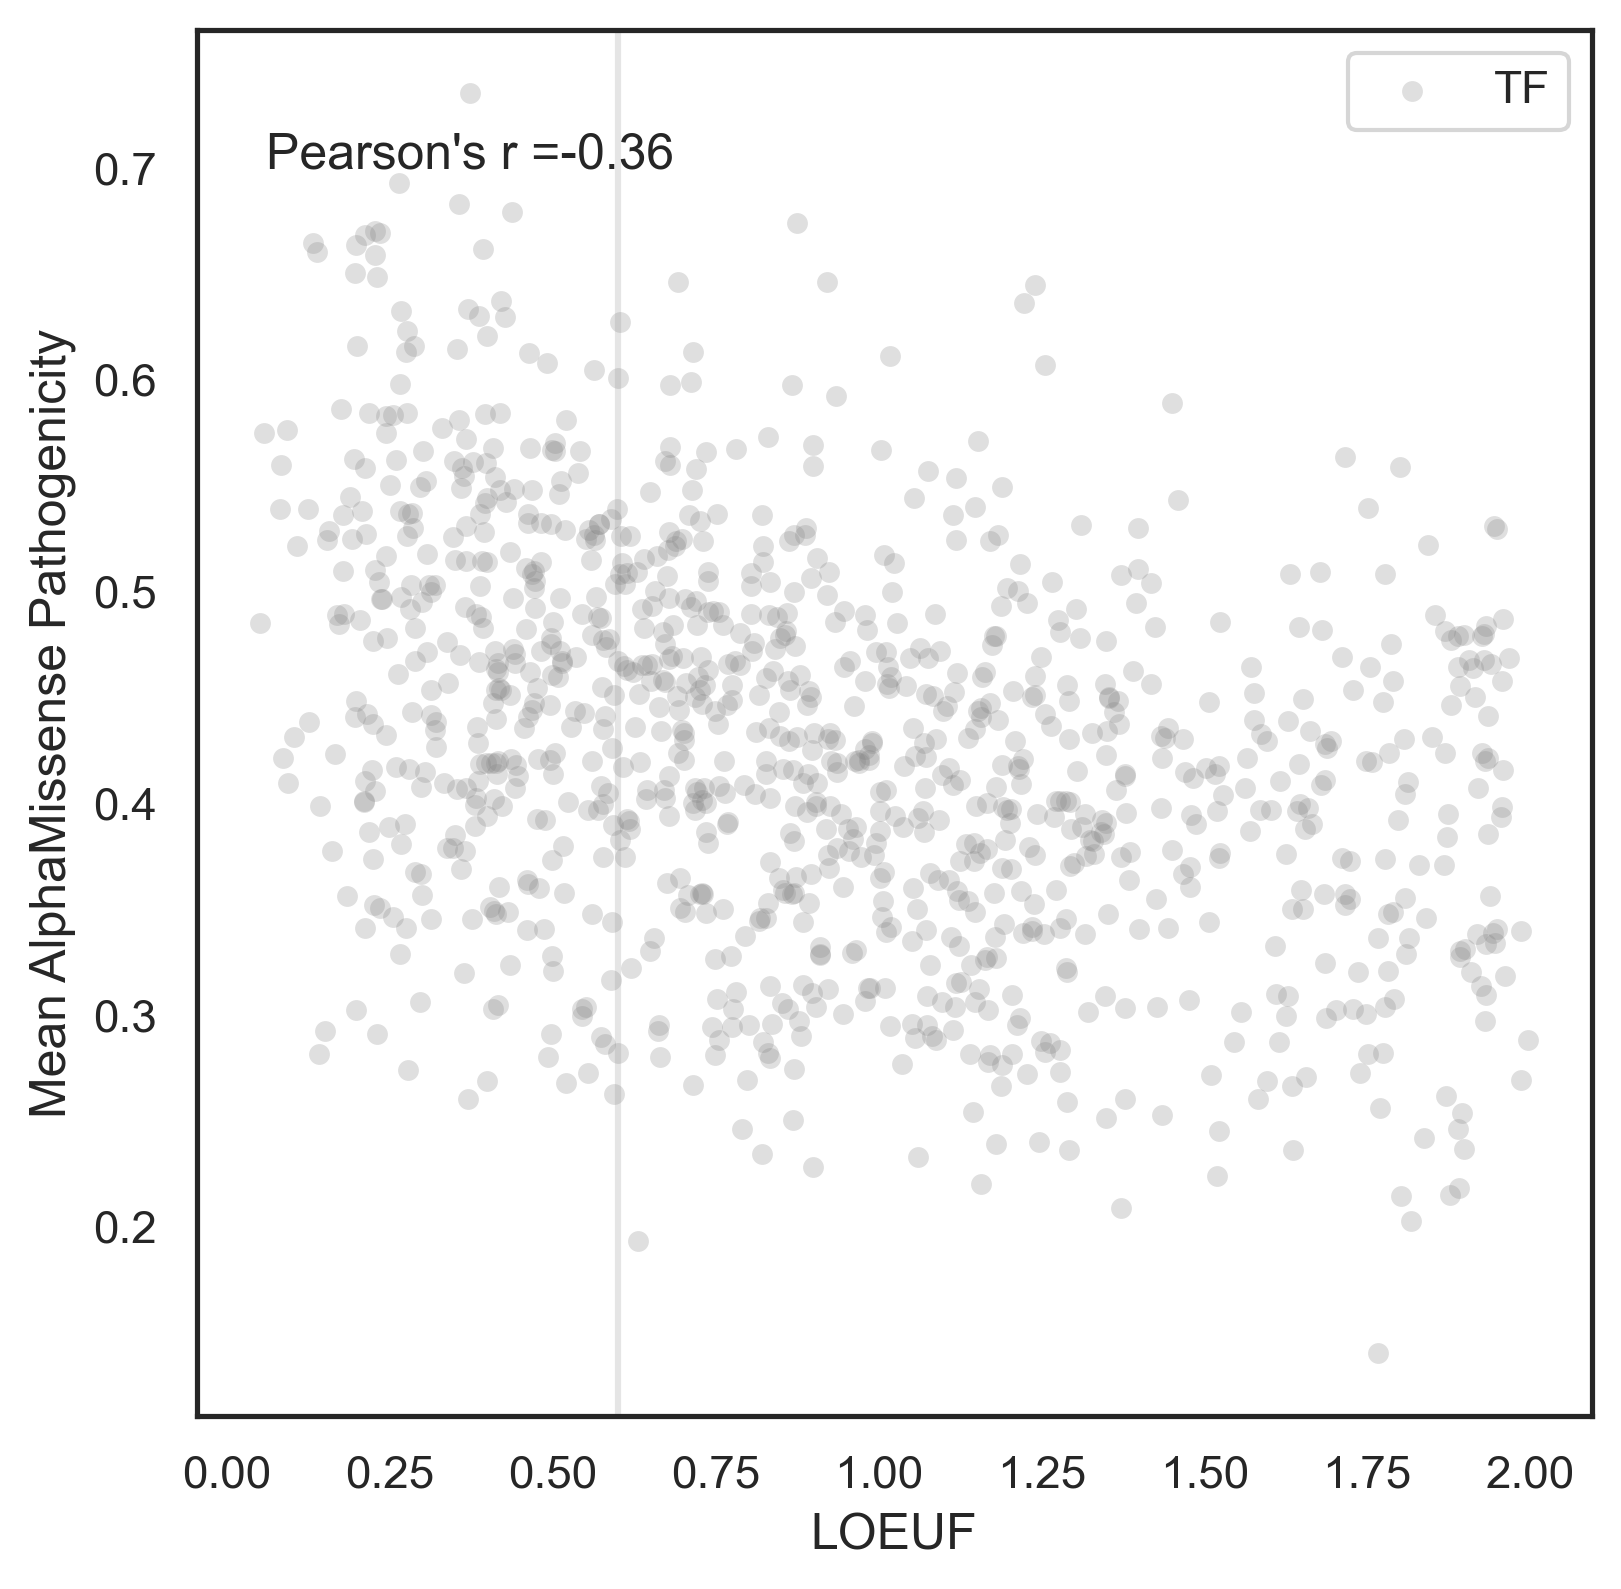

In [39]:
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.set_style("white")
sns.scatterplot(data = lambert_TFs, x = "LOEUF", y = "mean_am_pathogenicity", legend = True, 
                color = "gray", label = "TF",
                alpha = 0.25, s = 25, linewidth = 0, palette = ["gray", "b", "green"]);

r, p = sp.stats.pearsonr(x=lambert_TFs.dropna()['LOEUF'], y=lambert_TFs.dropna()['mean_am_pathogenicity'])
ax = plt.gca()
plt.text(.05, .9, "Pearson's r ={:.2f}".format(r), transform=ax.transAxes)
plt.ylabel("Mean AlphaMissense Pathogenicity")

plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2);

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_21526/206861679.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = lambert_TFs[lambert_TFs["SFARI_TF_with_AD"]], x = "LOEUF", y = "mean_am_pathogenicity",


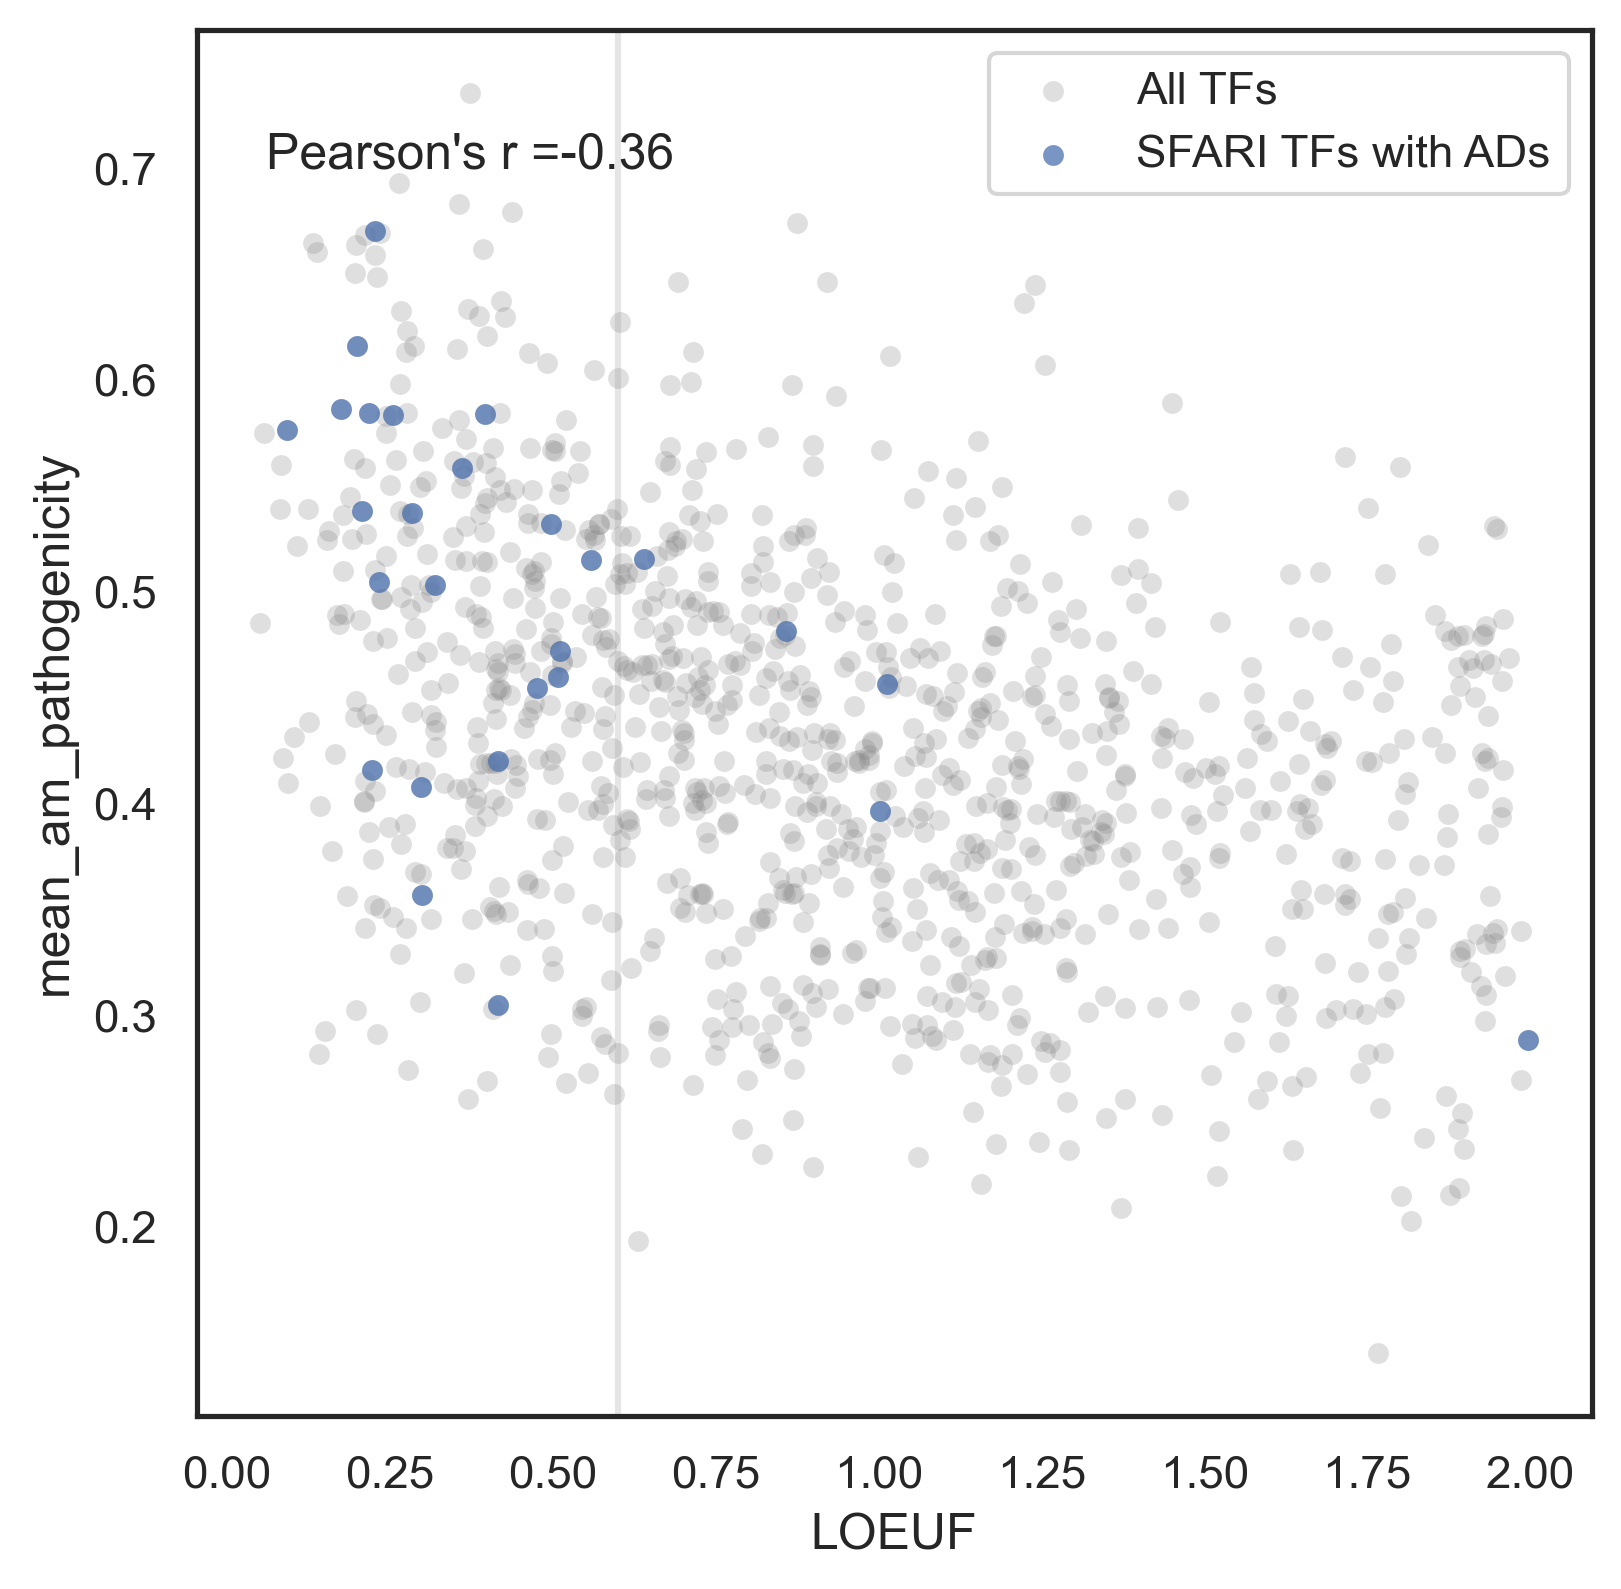

In [40]:
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.set_style("white")
sns.scatterplot(data = lambert_TFs, x = "LOEUF", y = "mean_am_pathogenicity", legend = True, label = "All TFs",
                color = "gray", 
                alpha = 0.25, s = 25, linewidth = 0);

sns.scatterplot(data = lambert_TFs[lambert_TFs["SFARI_TF_with_AD"]], x = "LOEUF", y = "mean_am_pathogenicity", 
                legend = True, label = "SFARI TFs with ADs",
                color = "b", 
                alpha = 0.75, s = 25, linewidth = 0, palette = ["gray", "b", "green"]);

r, p = sp.stats.pearsonr(x=lambert_TFs.dropna()['LOEUF'], y=lambert_TFs.dropna()['mean_am_pathogenicity'])
ax = plt.gca()
plt.text(.05, .9, "Pearson's r ={:.2f}".format(r), transform=ax.transAxes)

plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2);

In [41]:
import scipy as sp

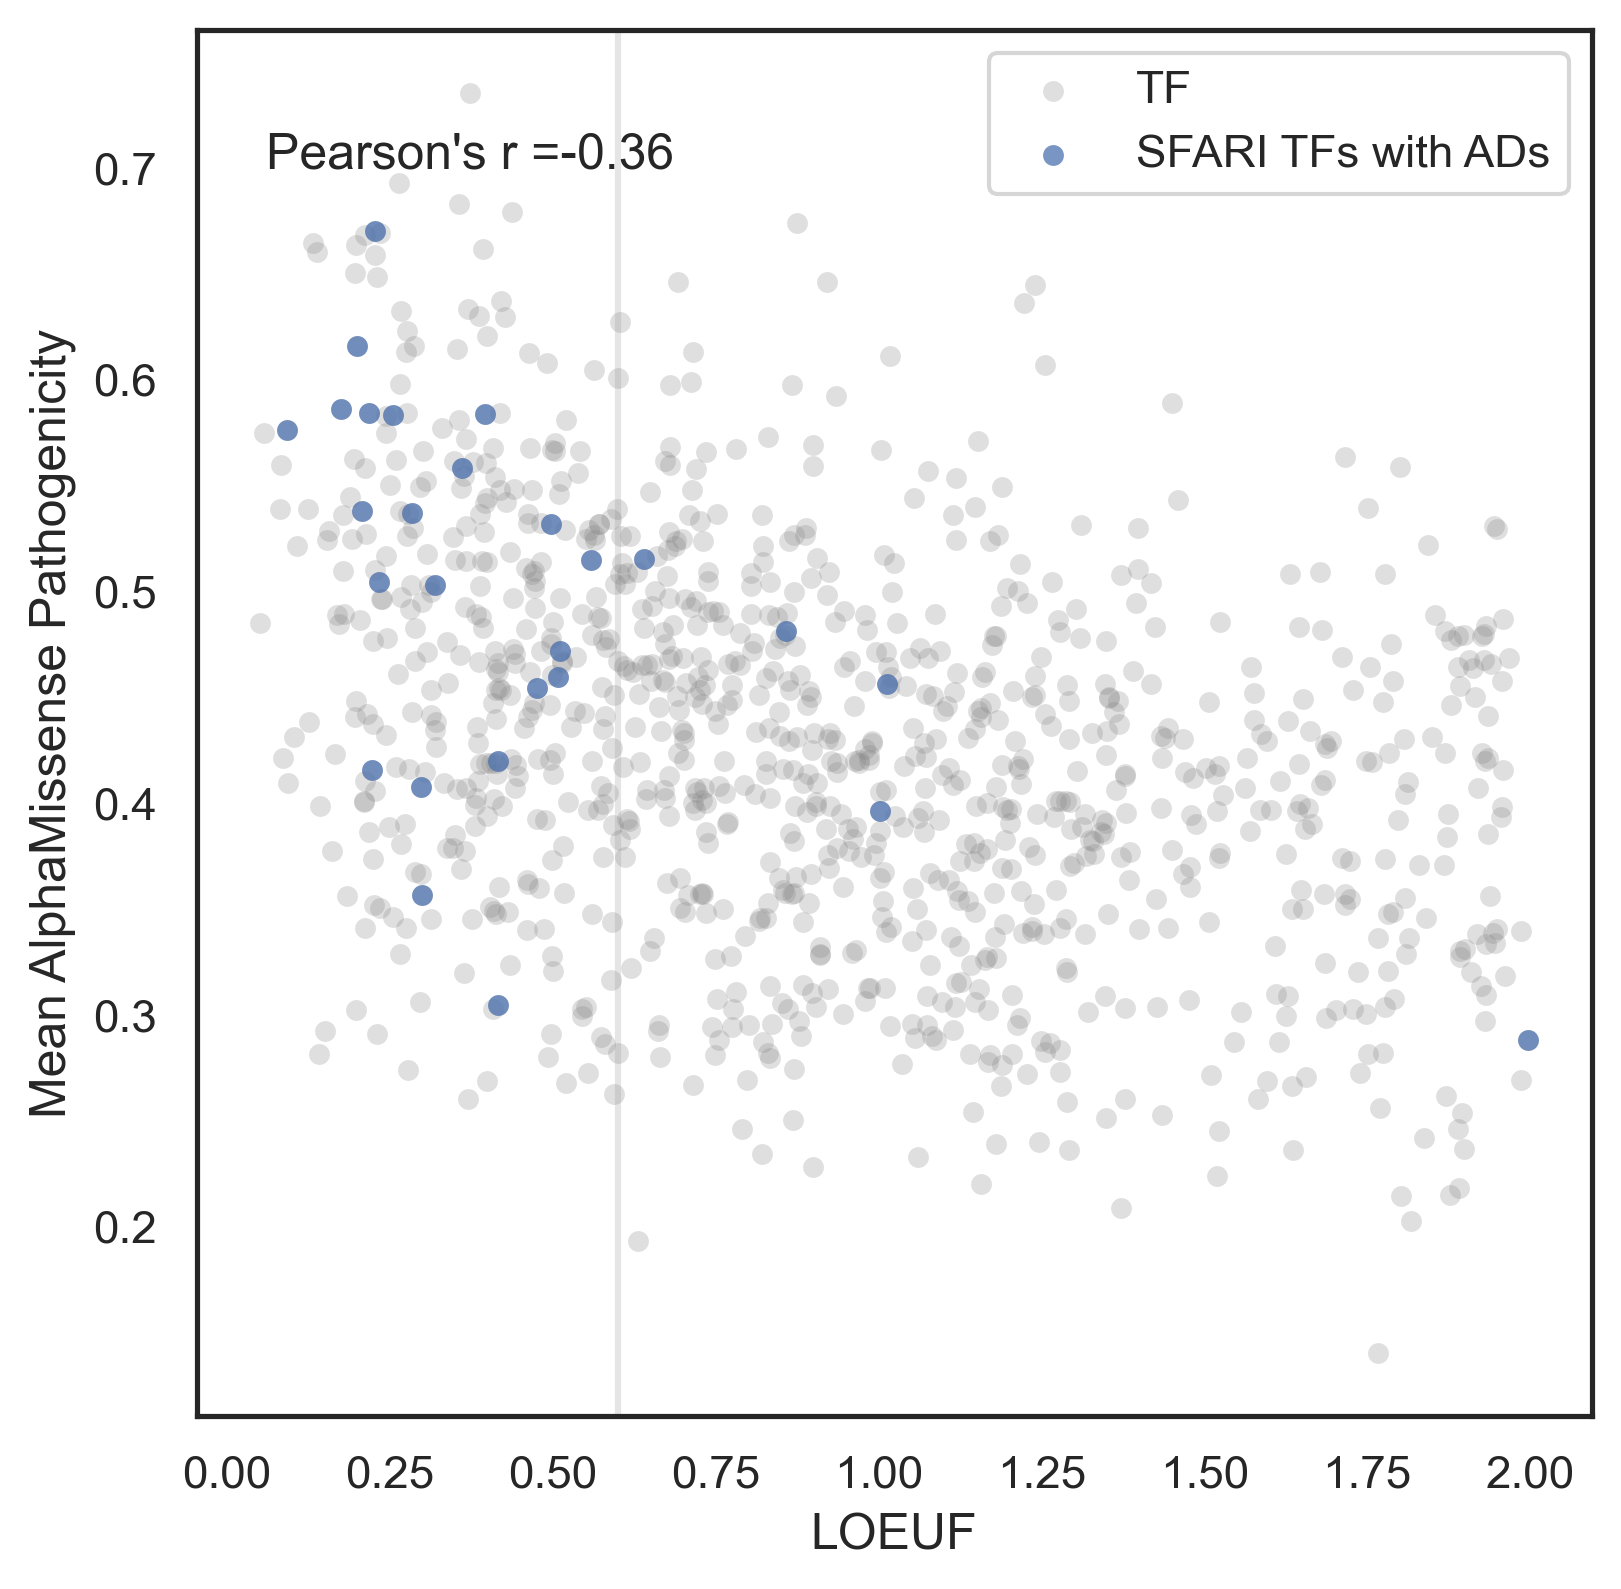

In [42]:
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.set_style("white")
sns.scatterplot(data = lambert_TFs, x = "LOEUF", y = "mean_am_pathogenicity", legend = True, label = "TF",
                color = "gray", 
                alpha = 0.25, s = 25, linewidth = 0);

sns.scatterplot(data = lambert_TFs[lambert_TFs["SFARI_TF_with_AD"]], x = "LOEUF", y = "mean_am_pathogenicity", 
                legend = True, label = "SFARI TFs with ADs",
                color = "b", 
                alpha = 0.75, s = 25, linewidth = 0);

# sns.scatterplot(data = lambert_TFs[lambert_TFs["SFARI_TF_hit"]], x = "LOEUF", y = "mean_am_pathogenicity", 
#                 legend = True, label = "SFARI TF Hits",
#                 color = "red",
#                 alpha = 1, s = 25, linewidth = 0);

r, p = sp.stats.pearsonr(x=lambert_TFs.dropna()['LOEUF'], y=lambert_TFs.dropna()['mean_am_pathogenicity'])
ax = plt.gca()
plt.text(.05, .9, "Pearson's r ={:.2f}".format(r), transform=ax.transAxes)

plt.ylabel("Mean AlphaMissense Pathogenicity")
plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2);

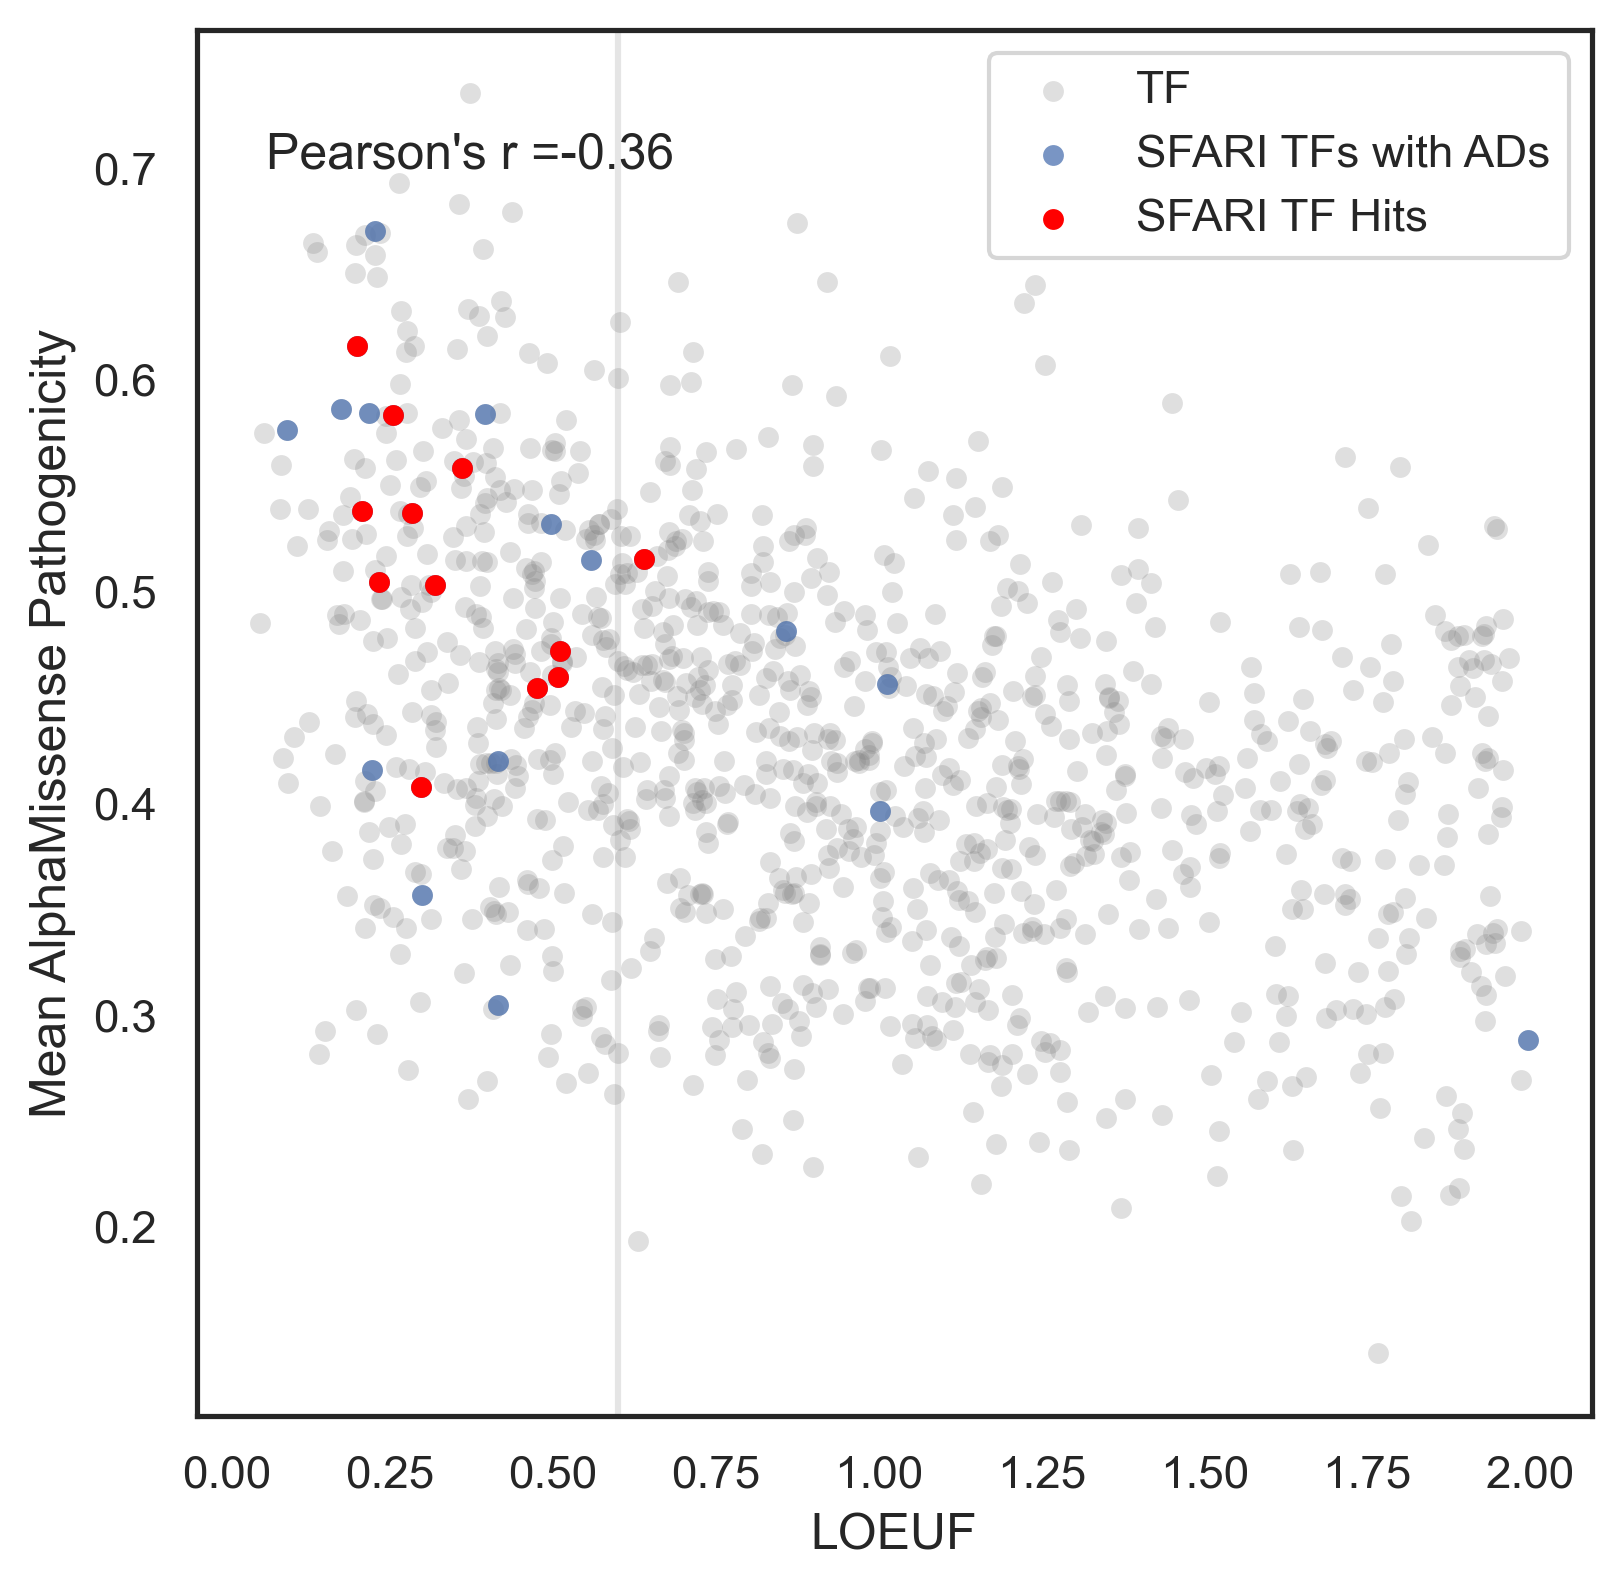

In [43]:
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.set_style("white")
sns.scatterplot(data = lambert_TFs, x = "LOEUF", y = "mean_am_pathogenicity", legend = True, label = "TF",
                color = "gray", 
                alpha = 0.25, s = 25, linewidth = 0);

sns.scatterplot(data = lambert_TFs[lambert_TFs["SFARI_TF_with_AD"]], x = "LOEUF", y = "mean_am_pathogenicity", 
                legend = True, label = "SFARI TFs with ADs",
                color = "b", 
                alpha = 0.75, s = 25, linewidth = 0);

sns.scatterplot(data = lambert_TFs[lambert_TFs["SFARI_TF_hit"]], x = "LOEUF", y = "mean_am_pathogenicity", 
                legend = True, label = "SFARI TF Hits",
                color = "red",
                alpha = 1, s = 25, linewidth = 0);

r, p = sp.stats.pearsonr(x=lambert_TFs.dropna()['LOEUF'], y=lambert_TFs.dropna()['mean_am_pathogenicity'])
ax = plt.gca()
plt.text(.05, .9, "Pearson's r ={:.2f}".format(r), transform=ax.transAxes)

plt.ylabel("Mean AlphaMissense Pathogenicity")
plt.axvline(0.6, 0,2, color = "gray", alpha = 0.2);

In [44]:
lambert_TFs

,gene_id,gene,LOEUF,transcript,transcript_id,mean_am_pathogenicity,SFARI_TF_with_AD,SFARI_TF_hit,Category
0,ENSG00000008196,TFAP2B,0.353,ENST00000393655,ENST00000393655.4,0.614557,False,False,TF
1,ENSG00000087510,TFAP2C,0.417,ENST00000201031,ENST00000201031.3,0.465959,False,False,TF
2,ENSG00000008197,TFAP2D,0.389,ENST00000008391,ENST00000008391.3,0.536534,False,False,TF
3,ENSG00000116819,TFAP2E,1.418,ENST00000373235,ENST00000373235.4,0.504094,False,False,TF
4,ENSG00000116017,ARID3A,0.442,ENST00000263620,ENST00000263620.8,0.407205,False,False,TF
...,...,...,...,...,...,...,...,...,...
1053,ENSG00000041988,THAP3,1.241,ENST00000054650,ENST00000054650.8,0.375345,False,False,TF
1054,ENSG00000176946,THAP4,0.585,ENST00000407315,ENST00000407315.6,0.404626,False,False,TF
1055,ENSG00000177683,THAP5,1.089,ENST00000415914,ENST00000415914.4,0.287857,False,False,TF
1056,ENSG00000161277,THAP8,1.615,ENST00000292894,ENST00000292894.2,0.287022,False,False,TF


In [45]:
min_hit_LOEUF = min(lambert_TFs[lambert_TFs["SFARI_TF_hit"]]["LOEUF"])
min_hit_LOEUF

0.2

In [46]:
lambert_TFs[(lambert_TFs["Category"] == "SFARI_TF with AD") & (lambert_TFs["LOEUF"] < min_hit_LOEUF)]

,gene_id,gene,LOEUF,transcript,transcript_id,mean_am_pathogenicity,SFARI_TF_with_AD,SFARI_TF_hit,Category
1026,ENSG00000162599,NFIA,0.175,ENST00000403491,ENST00000403491.8,0.586197,True,False,SFARI_TF with AD
1028,ENSG00000008441,NFIX,0.092,ENST00000592199,ENST00000592199.5,0.576230,True,False,SFARI_TF with AD


In [47]:
lambert_TFs[(lambert_TFs["Category"] == "SFARI_TF with AD") & (lambert_TFs["LOEUF"] < min_hit_LOEUF)][["gene", "LOEUF", "mean_am_pathogenicity"]].sort_values(by = "mean_am_pathogenicity", ascending = False)

,gene,LOEUF,mean_am_pathogenicity
1026,NFIA,0.175,0.586197
1028,NFIX,0.092,0.576230


In [48]:
max_hit_am_pathog = max(lambert_TFs[lambert_TFs["SFARI_TF_hit"]]["mean_am_pathogenicity"])
max_hit_am_pathog

0.6160129161698233

In [49]:
lambert_TFs[(lambert_TFs["Category"] == "SFARI_TF with AD") & (lambert_TFs["mean_am_pathogenicity"] > max_hit_am_pathog)]

,gene_id,gene,LOEUF,transcript,transcript_id,mean_am_pathogenicity,SFARI_TF_with_AD,SFARI_TF_hit,Category
1030,ENSG00000141646,SMAD4,0.227,ENST00000342988,ENST00000342988.7,0.670472,True,False,SFARI_TF with AD


In [50]:
lambert_TFs[(lambert_TFs["Category"] == "SFARI_TF with AD") & (lambert_TFs["mean_am_pathogenicity"] > max_hit_am_pathog)][["gene", "LOEUF", "mean_am_pathogenicity"]].sort_values(by = "LOEUF")

,gene,LOEUF,mean_am_pathogenicity
1030,SMAD4,0.227,0.670472


In [51]:
import scipy as sp

In [52]:
r, p = sp.stats.pearsonr(x=lambert_TFs.dropna()['LOEUF'], y=lambert_TFs.dropna()['mean_am_pathogenicity'])
r

-0.3644898285241327

In [53]:
p

1.833630081015099e-34

In [54]:
# Bottom 5 and top 5 LOEUF SFARI TFs with ADs(not hits)
lambert_TFs[lambert_TFs["Category"] == "SFARI_TF with AD"].sort_values(by = "LOEUF")

,gene_id,gene,LOEUF,transcript,transcript_id,mean_am_pathogenicity,SFARI_TF_with_AD,SFARI_TF_hit,Category
1028,ENSG00000008441,NFIX,0.092,ENST00000592199,ENST00000592199.5,0.576230,True,False,SFARI_TF with AD
1026,ENSG00000162599,NFIA,0.175,ENST00000403491,ENST00000403491.8,0.586197,True,False,SFARI_TF with AD
200,ENSG00000118263,KLF7,0.219,ENST00000309446,ENST00000309446.11,0.584387,True,False,SFARI_TF with AD
22,ENSG00000080603,SRCAP,0.223,ENST00000262518,ENST00000262518.9,0.415601,True,False,SFARI_TF with AD
1030,ENSG00000141646,SMAD4,0.227,ENST00000342988,ENST00000342988.7,0.670472,True,False,SFARI_TF with AD
1019,ENSG00000181827,RFX7,0.300,ENST00000559447,ENST00000559447.6,0.356686,True,False,SFARI_TF with AD
166,ENSG00000179388,EGR3,0.396,ENST00000317216,ENST00000317216.3,0.583812,True,False,SFARI_TF with AD
177,ENSG00000127124,HIVEP3,0.417,ENST00000372583,ENST00000372583.6,0.304705,True,False,SFARI_TF with AD
203,ENSG00000188786,MTF1,0.417,ENST00000373036,ENST00000373036.5,0.419900,True,False,SFARI_TF with AD
32,ENSG00000172379,ARNT2,0.498,ENST00000303329,ENST00000303329.9,0.531844,True,False,SFARI_TF with AD


In [55]:
bottom_5_loeuf_sfari_TFs_with_ADs = lambert_TFs[lambert_TFs["Category"] == "SFARI_TF with AD"].sort_values(by = "LOEUF")[:5]
bottom_5_loeuf_sfari_TFs_with_ADs[["gene", "LOEUF"]]

,gene,LOEUF
1028,NFIX,0.092
1026,NFIA,0.175
200,KLF7,0.219
22,SRCAP,0.223
1030,SMAD4,0.227


In [56]:
bottom_5_loeuf_sfari_TFs_with_ADs = lambert_TFs[lambert_TFs["Category"] == "SFARI_TF with AD"].sort_values(by = "LOEUF")[-5:]
bottom_5_loeuf_sfari_TFs_with_ADs[["gene", "LOEUF"]]

,gene,LOEUF
747,DLX3,0.559
8,KDM5B,0.858
933,ESR2,1.002
831,MSX2,1.013
997,TET2,1.997


Adding K/S stat

In [57]:
lambert_TFs["Category"].value_counts()

Category
TF                  1031
SFARI_TF with AD      15
SFARI TF Hit          12
Name: count, dtype: int64